In [1]:
import pandas as pd
import re
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import scipy
from tqdm.notebook import tqdm
import matplotlib as mpl

In [2]:
def to_array(x):
    
    return [float(x) for x in re.sub("\s|array|\(|\)","",x[1:-1]).split(",")]

In [3]:
seriesfields =   ["Emotion_pos_series",
            "Emotion_neg_series",
            "Attraction_series",
            "Body_pos_series",
            "Body_neg_series",
            "Char_pos_series",
            "Char_neg_series",
            "ME_series",
            "HE_series",
            "CO_series"]

In [4]:
meta = pd.read_csv("chr_meta.tsv",sep="\t", index_col=2)

In [5]:
data = pd.read_csv("bigframe.tsv", sep="\t", index_col=0)

In [6]:
data["ID"] = list(data.index)
data = data.dropna()

In [7]:
def match(x,f):
    
    try:
        return meta.loc[x,f]
    except:
        return np.nan
    
data["Series"] = data.ID.apply(lambda x: match(x,"series"))
data["Genre"] = data.ID.apply(lambda x: match(x,"genre"))
data["Publisher"] = data.ID.apply(lambda x: match(x,"publisher"))

In [8]:
sd = data.groupby("Series").count()
sdrop = list(sd[sd.fname < 20].index)
data = data.drop(data[data.Series.isin(sdrop)].index)

In [9]:
data.loc[data[data.Series == "Irrlicht"].index, "Publisher"] = "Kelter"
data.loc[data[data.Series == "VERGISS MEIN NICHT"].index, "Publisher"] = "VmL"
data.loc[data[data.Series == "Siliva Duett"].index, "Series"] = "Silvia"
data.loc[data[data.Series == "Siliva Gold"].index, "Series"] = "Silvia"
data.loc[data[data.Series == "Baccara"].index, "Publisher"] = "Cora"

In [10]:
for s in set(data.Series):
    
    p = list(data[data.Series == s].Publisher)[0]
    p = list(p)[0].upper()
    
    data.loc[data[data.Series == s].index, "Series"] = s+" ("+p+")"

In [11]:
colordict = {"liebe":(0.7686274509803922, 0.3058823529411765, 0.3215686274509804),
          "arzt":(0.2980392156862745, 0.4470588235294118, 0.6901960784313725),
          "heimat":(0.3333333333333333, 0.6588235294117647, 0.40784313725490196),
          "romantic suspense":(0.5058823529411764, 0.4470588235294118, 0.7019607843137254),
          "misc":(0.5490196078431373, 0.5490196078431373, 0.5490196078431373)}


colorv = {"Bastei":"blue", 
              "Cora":"red", 
              "Kelter":"green",
              "VmL":"grey"}

colordicts = {}

for s in set(data.Series):
    
    colordicts[s] = colordict[list(data[data.Series == s].Genre)[0]]
    
    
colordictv = {}

for s in set(data.Series):
    
    colordictv[s] = colorv[list(data[data.Series == s].Publisher)[0]]

In [12]:
trans = {"liebe":"Romance",
         "arzt":"Medical Romance",
         "heimat":"Heimatroman",
         "misc":"Medical Heimatroman",
         "romantic suspense":"Romantic Suspense"
}

In [13]:
colordicts = {'Courths-Mahler (B)': (0.7686274509803922,
  0.3058823529411765,
  0.3215686274509804),
 'Dr. Stefan Frank (B)': (0.2980392156862745,
  0.4470588235294118,
  0.6901960784313725),
 'Baccara (C)': (0.7686274509803922, 0.3058823529411765, 0.3215686274509804),
 'Julia (C)': (0.7686274509803922, 0.3058823529411765, 0.3215686274509804),
 'Tiffany (C)': (0.7686274509803922, 0.3058823529411765, 0.3215686274509804),
 'Alpengold (B)': (0.3333333333333333,
  0.6588235294117647,
  0.40784313725490196),
 'Silvia (B)': (0.7686274509803922, 0.3058823529411765, 0.3215686274509804),
 'Das Berghotel (B)': (0.3333333333333333,
  0.6588235294117647,
  0.40784313725490196),
 'Irrlicht (K)': (0.5058823529411764, 0.4470588235294118, 0.7019607843137254),
 'Der Bergdoktor (B)': (0.5490196078431373, 0.5490196078431373, 0.5490196078431373),
 'Ärzte zum Verlieben (C)': (0.2980392156862745,
  0.4470588235294118,
  0.6901960784313725)}

In [14]:
sns.set(font_scale=1.6)

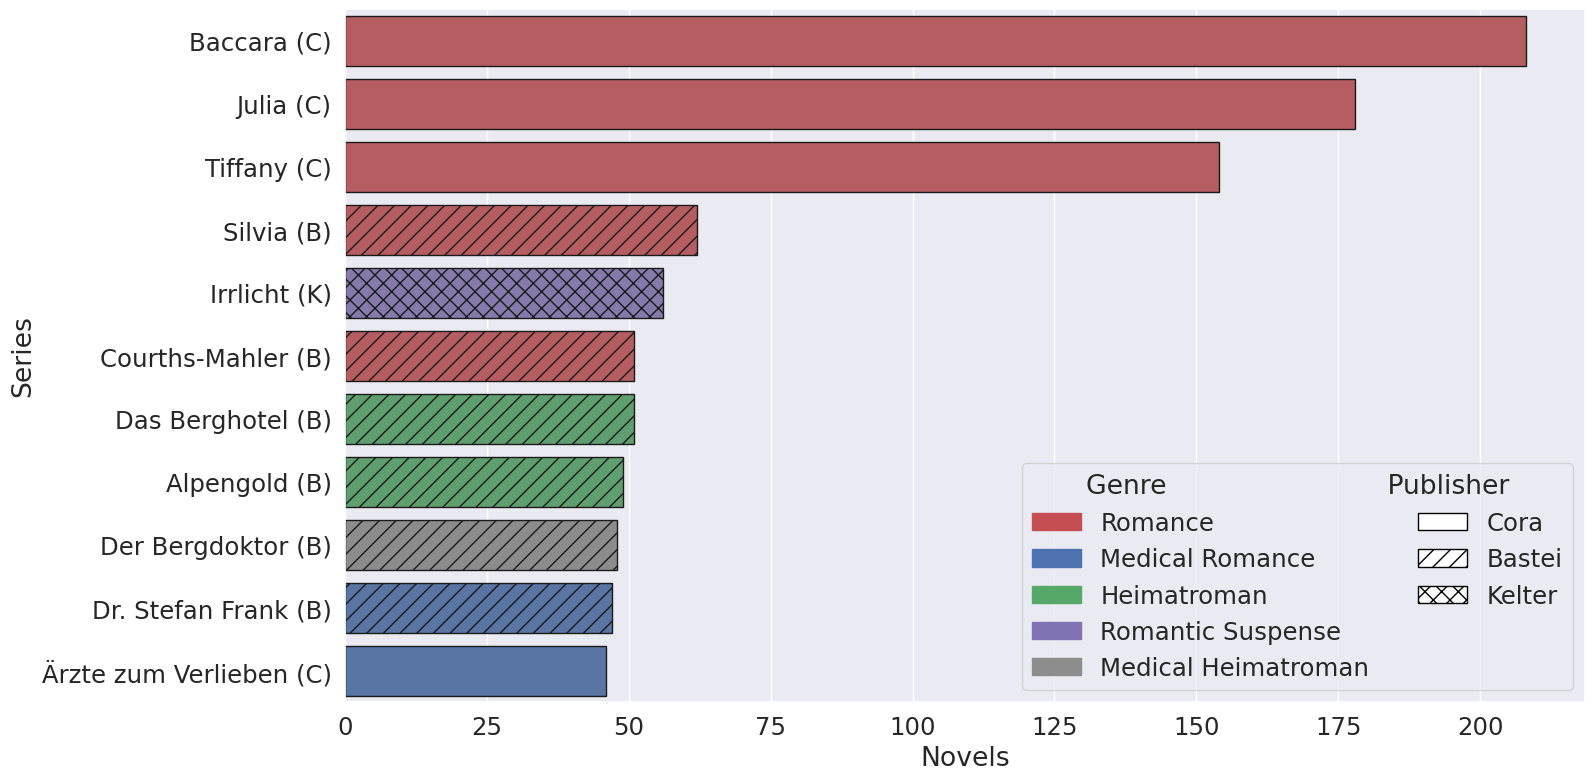

In [26]:
hatchedict = {
    "Cora":"",
    "Bastei":"//",
    "Kelter":"xx",
}
            
fig, ax = plt.subplots(figsize=(16,9))

pdata = data.groupby("Series").count()["fname"]
pdata = pdata.sort_values(ascending=False)
pdata = pd.DataFrame(pdata)

pdata["Series"] = list(pdata.index)
pdata["Publisher"]  = pdata["Series"].apply(lambda x: list(data[data.Series == x].Publisher)[0])
ax = sns.barplot(data=pdata, x="fname", y="Series", palette=colordicts)

# select the correct patches
patches = [patch for patch in ax.patches]
hatches = [hatchedict[x] for x in pdata["Publisher"]]
# the number of patches should be evenly divisible by the number of hatches
h = hatches * (len(patches) // len(hatches))
# iterate through the patches for each subplot
for patch, hatch in zip(patches, h):
    patch.set_hatch(hatch)
    patch.set_edgecolor('k')
    
patches =[]
for k in colordict.keys():
    
    patches.append(mpatches.Patch(color=colordict[k], label=trans[k]))
    
for k in hatchedict.keys():
    
    patches.append(mpatches.Patch(hatch=hatchedict[k], label=k, facecolor="white", edgecolor="black"))

patches.append(mpatches.Patch(color="white", label="", alpha=0))

plt.legend(title="Genre                          Publisher",ncol=2, handles=patches)
    
plt.xlabel("Novels")
plt.savefig("plots/Corpus.png", dpi=300, bbox_inches="tight", format="png")
plt.show()

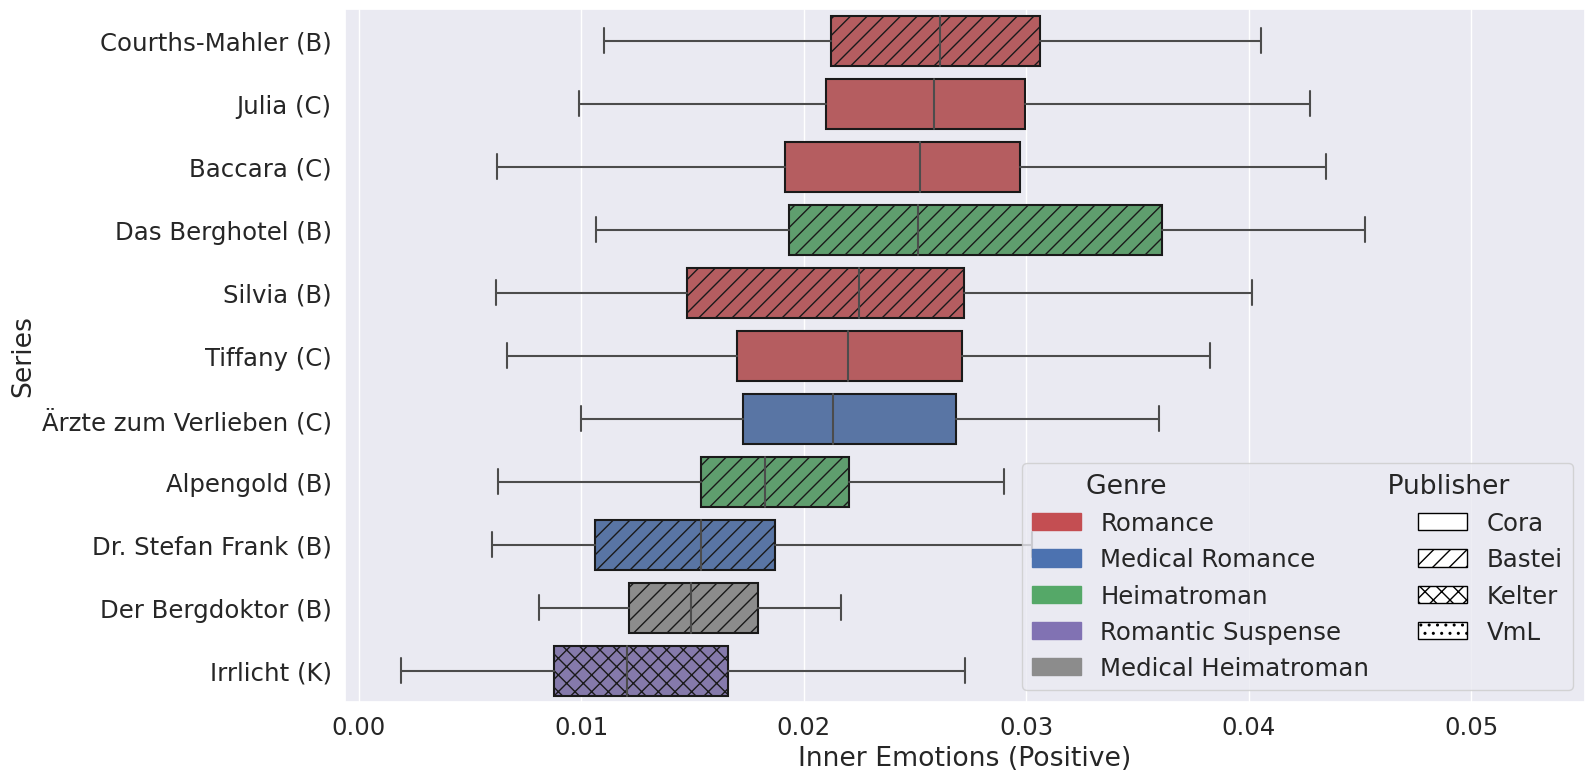

In [167]:
fig, ax = plt.subplots(figsize=(16,9))

order = data.groupby("Series").median("Emotion_pos_mean").sort_values("Emotion_pos_mean").index[::-1]


ax = sns.boxplot(data=data, y="Series", x="Emotion_pos_mean", order=order, fliersize=0, palette=colordicts)

# select the correct patches
patches = [patch for patch in ax.patches]
hatches = [hatchedict[x] for x in [list(data[data.Series == x].Publisher)[0] for x in order]]
# the number of patches should be evenly divisible by the number of hatches
h = hatches * (len(patches) // len(hatches))
# iterate through the patches for each subplot
for patch, hatch in zip(patches, h):
    patch.set_hatch(hatch)
    patch.set_edgecolor('k')


patches =[]
for k in colordict.keys():
    
    patches.append(mpatches.Patch(color=colordict[k], label=trans[k]))
    plt.legend(handles=patches)
    
for k in hatchedict.keys():
    
    patches.append(mpatches.Patch(hatch=hatchedict[k], label=k, facecolor="white", edgecolor="black"))
    
plt.legend(title="Genre                          Publisher",ncol=2, handles=patches)


plt.xlabel("Inner Emotions (Positive)")
plt.savefig("plots/Inner_Emotions_Positive.png", dpi=300, bbox_inches="tight", format="png")
plt.show()

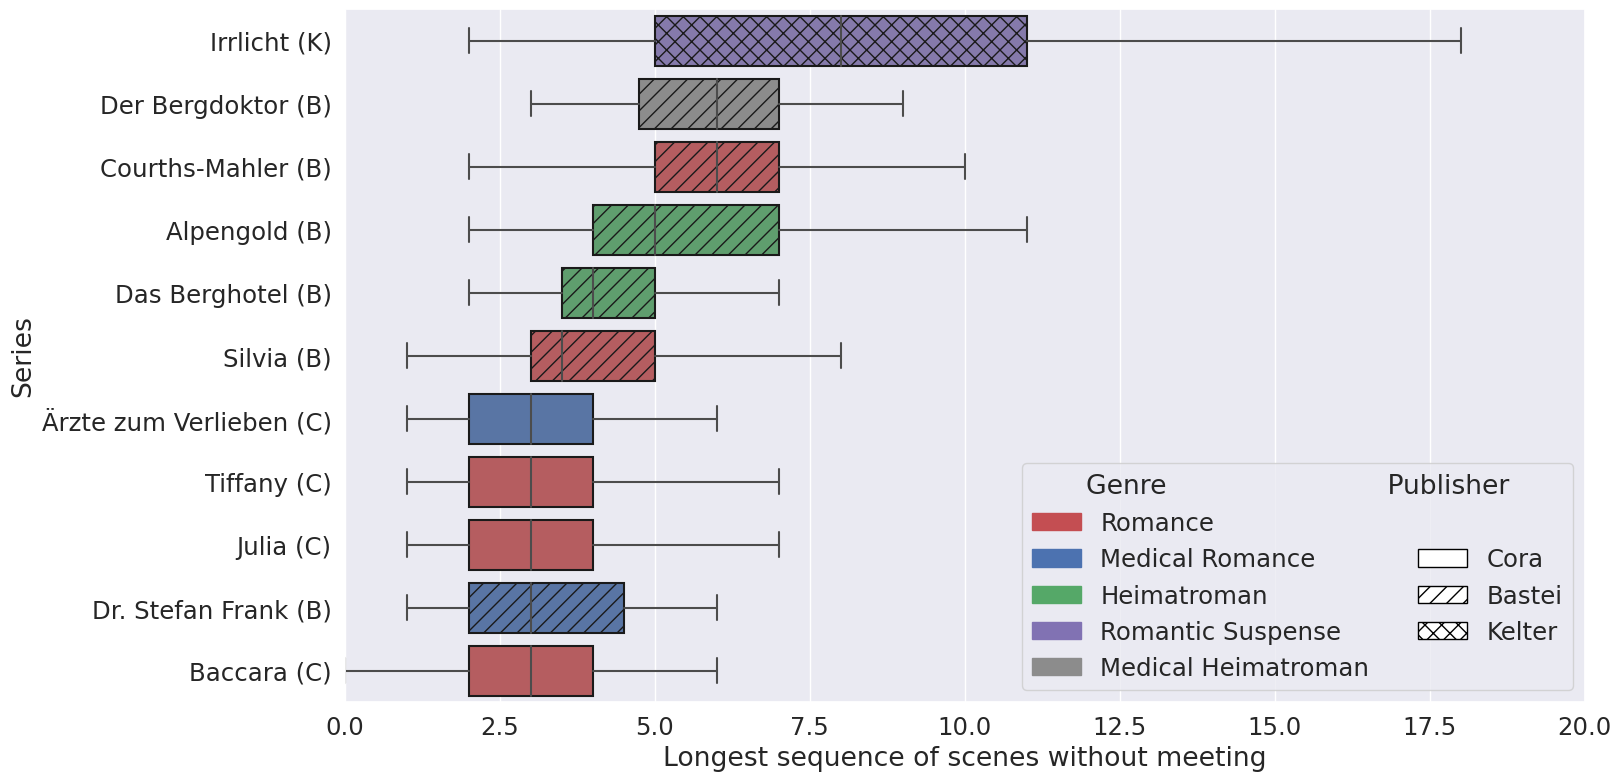

In [24]:
fig, ax = plt.subplots(figsize=(16,9))

order = data.groupby("Series").median("ME_long").sort_values("ME_long").index[::-1]


sns.boxplot(data=data, y="Series", x="ME_long", order=order, fliersize=0, palette=colordicts)

patches =[]
for k in colordict.keys():
    
    patches.append(mpatches.Patch(color=colordict[k], label=trans[k]))
    plt.legend(handles=patches)
    
# select the correct patches
patches = [patch for patch in ax.patches]
hatches = [hatchedict[x] for x in [list(data[data.Series == x].Publisher)[0] for x in order]]
# the number of patches should be evenly divisible by the number of hatches
h = hatches * (len(patches) // len(hatches))
# iterate through the patches for each subplot
for patch, hatch in zip(patches, h):
    patch.set_hatch(hatch)
    patch.set_edgecolor('k')


patches =[]
for k in colordict.keys():
    
    patches.append(mpatches.Patch(color=colordict[k], label=trans[k]))
    plt.legend(handles=patches)
    
patches.append(mpatches.Patch(color="white", label="", alpha=0))


for k in hatchedict.keys():
    
    patches.append(mpatches.Patch(hatch=hatchedict[k], label=k, facecolor="white", edgecolor="black"))
    
plt.legend(title="Genre                          Publisher", ncol=2, handles=patches)


plt.xlim(0,20)
plt.xlabel("Longest sequence of scenes without meeting")
plt.savefig("plots/ME_long.png", dpi=300, bbox_inches="tight", format="png")
plt.show()

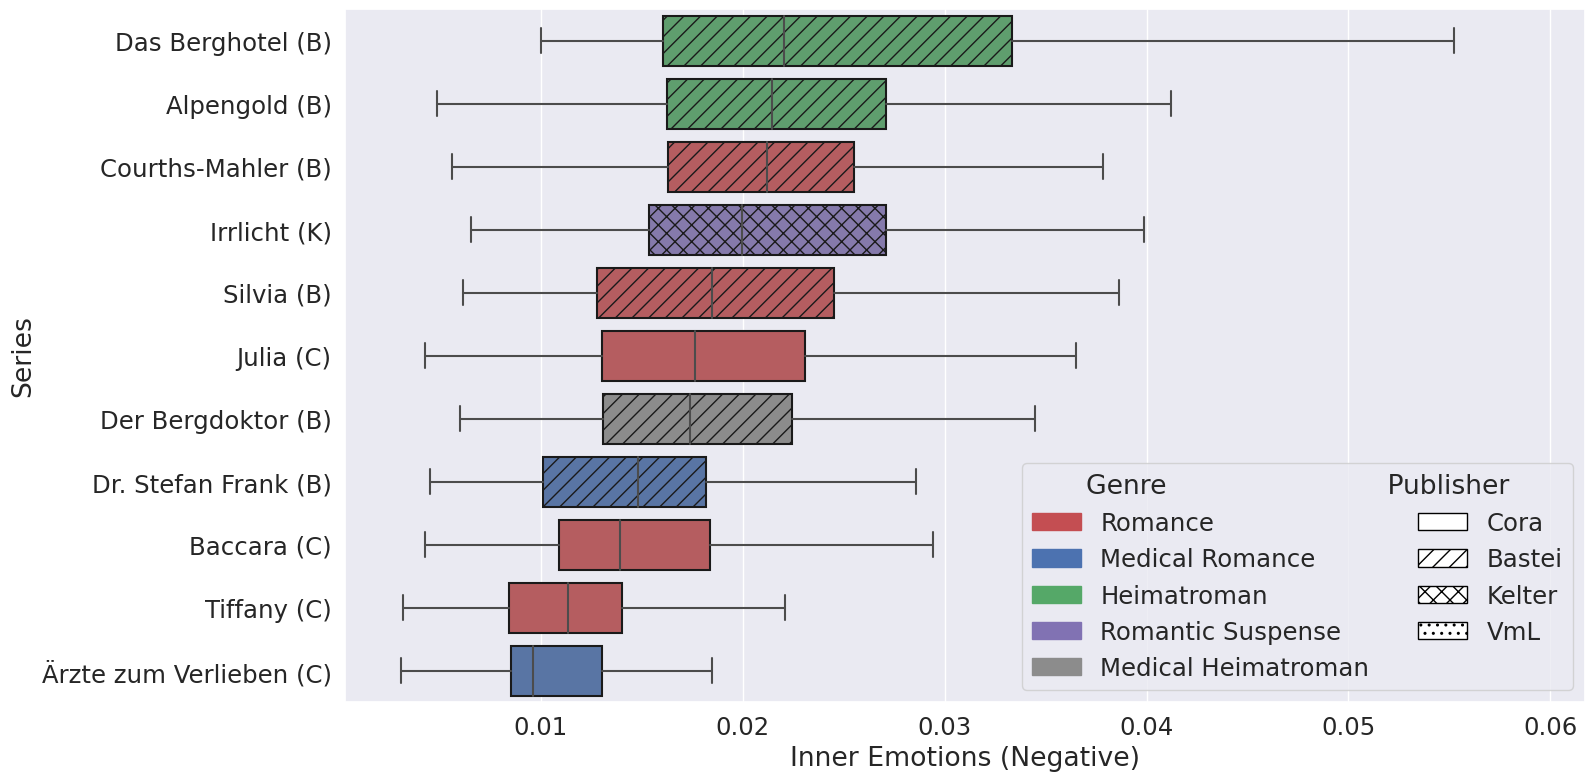

In [169]:
fig, ax = plt.subplots(figsize=(16,9))

order = data.groupby("Series").median("Emotion_neg_mean").sort_values("Emotion_neg_mean").index[::-1]

sns.boxplot(data=data, y="Series", x="Emotion_neg_mean", order=order, fliersize=0, palette=colordicts)

patches = []
for k in colordict.keys():
    
    patches.append(mpatches.Patch(color=colordict[k], label=trans[k]))
    plt.legend(handles=patches)
  

# select the correct patches
patches = [patch for patch in ax.patches]
hatches = [hatchedict[x] for x in [list(data[data.Series == x].Publisher)[0] for x in order]]
# the number of patches should be evenly divisible by the number of hatches
h = hatches * (len(patches) // len(hatches))
# iterate through the patches for each subplot
for patch, hatch in zip(patches, h):
    patch.set_hatch(hatch)
    patch.set_edgecolor('k')


patches =[]
for k in colordict.keys():
    
    patches.append(mpatches.Patch(color=colordict[k], label=trans[k]))
    plt.legend(handles=patches)
    
for k in hatchedict.keys():
    
    patches.append(mpatches.Patch(hatch=hatchedict[k], label=k, facecolor="white", edgecolor="black"))
    
plt.legend(title="Genre                          Publisher",ncol=2, handles=patches)


plt.xlabel("Inner Emotions (Negative)")
plt.savefig("plots/Inner_Emotions_Negative.png", dpi=300, bbox_inches="tight", format="png")
plt.show()

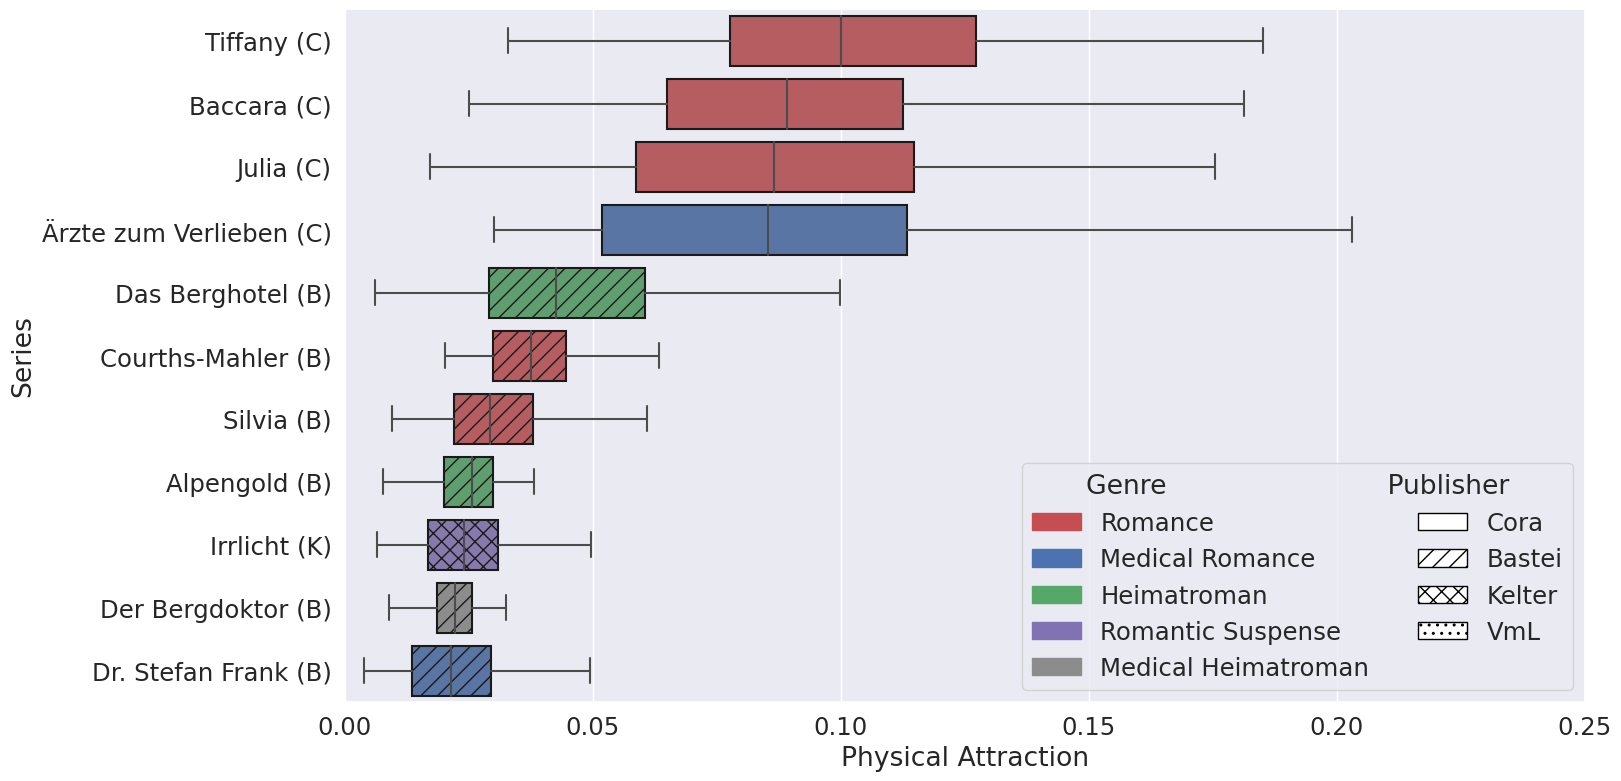

In [170]:
fig, ax = plt.subplots(figsize=(16,9))

order = data.groupby("Series").median("Attraction_mean").sort_values("Attraction_mean").index[::-1]


sns.boxplot(data=data, y="Series", x="Attraction_mean", order=order, fliersize=0, palette=colordicts)

patches = []
for k in colordict.keys():
    
    patches.append(mpatches.Patch(color=colordict[k], label=trans[k]))
    plt.legend(handles=patches)

# select the correct patches
patches = [patch for patch in ax.patches]
hatches = [hatchedict[x] for x in [list(data[data.Series == x].Publisher)[0] for x in order]]
# the number of patches should be evenly divisible by the number of hatches
h = hatches * (len(patches) // len(hatches))
# iterate through the patches for each subplot
for patch, hatch in zip(patches, h):
    patch.set_hatch(hatch)
    patch.set_edgecolor('k')


patches =[]
for k in colordict.keys():
    
    patches.append(mpatches.Patch(color=colordict[k], label=trans[k]))
    plt.legend(handles=patches)
    
for k in hatchedict.keys():
    
    patches.append(mpatches.Patch(hatch=hatchedict[k], label=k, facecolor="white", edgecolor="black"))
    
plt.legend(title="Genre                          Publisher",ncol=2, handles=patches)

plt.xlim(0,0.25)    
plt.xlabel("Physical Attraction")
plt.savefig("Physical_attraction.png", dpi=300, bbox_inches="tight", format="png")
plt.show()

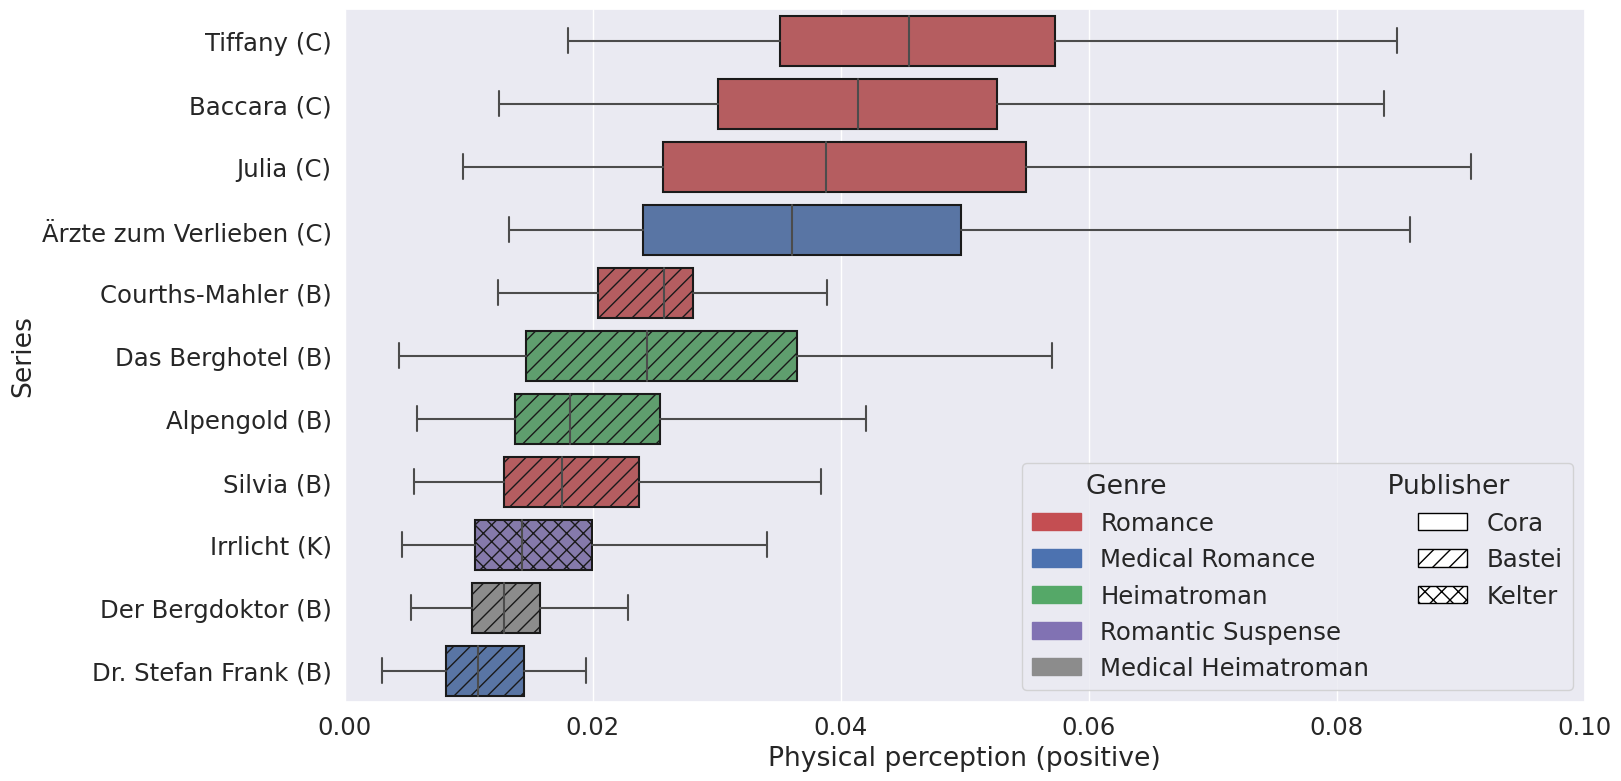

In [25]:
fig, ax = plt.subplots(figsize=(16,9))

order = data.groupby("Series").median("Body_pos_mean").sort_values("Body_pos_mean").index[::-1]


sns.boxplot(data=data, y="Series", x="Body_pos_mean", order=order, fliersize=0, palette=colordicts)

patches = []
for k in colordict.keys():
    
    patches.append(mpatches.Patch(color=colordict[k], label=trans[k]))
    plt.legend(handles=patches)

# select the correct patches
patches = [patch for patch in ax.patches]
hatches = [hatchedict[x] for x in [list(data[data.Series == x].Publisher)[0] for x in order]]
# the number of patches should be evenly divisible by the number of hatches
h = hatches * (len(patches) // len(hatches))
# iterate through the patches for each subplot
for patch, hatch in zip(patches, h):
    patch.set_hatch(hatch)
    patch.set_edgecolor('k')


patches =[]
for k in colordict.keys():
    
    patches.append(mpatches.Patch(color=colordict[k], label=trans[k]))
    plt.legend(handles=patches)
    
for k in hatchedict.keys():
    
    patches.append(mpatches.Patch(hatch=hatchedict[k], label=k, facecolor="white", edgecolor="black"))
patches.append(mpatches.Patch(color="white", label="", alpha=0))

plt.legend(title="Genre                          Publisher",ncol=2, handles=patches)

plt.xlim(0,0.1)
plt.xlabel("Physical perception (positive)")
plt.savefig("plots/Physical_perception_positive.png", dpi=300, bbox_inches="tight", format="png")
plt.show()

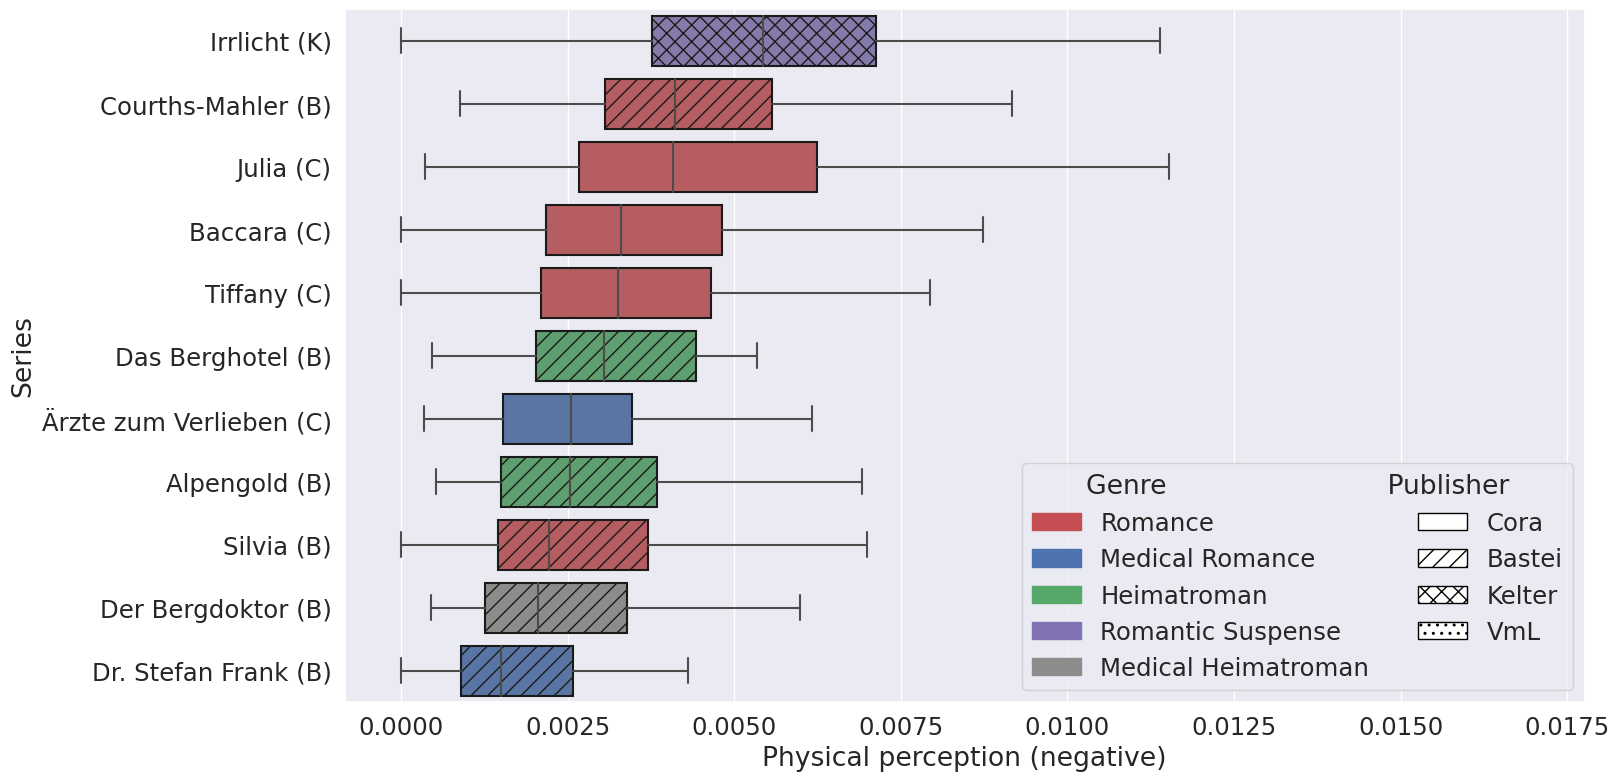

In [172]:
fig, ax = plt.subplots(figsize=(16,9))

order = data.groupby("Series").median("Body_neg_mean").sort_values("Body_neg_mean").index[::-1]


sns.boxplot(data=data, y="Series", x="Body_neg_mean", order=order, fliersize=0, palette=colordicts)

patches = []
for k in colordict.keys():
    
    patches.append(mpatches.Patch(color=colordict[k], label=trans[k]))
    plt.legend(handles=patches)

# select the correct patches
patches = [patch for patch in ax.patches]
hatches = [hatchedict[x] for x in [list(data[data.Series == x].Publisher)[0] for x in order]]
# the number of patches should be evenly divisible by the number of hatches
h = hatches * (len(patches) // len(hatches))
# iterate through the patches for each subplot
for patch, hatch in zip(patches, h):
    patch.set_hatch(hatch)
    patch.set_edgecolor('k')


patches =[]
for k in colordict.keys():
    
    patches.append(mpatches.Patch(color=colordict[k], label=trans[k]))
    plt.legend(handles=patches)
    
for k in hatchedict.keys():
    
    patches.append(mpatches.Patch(hatch=hatchedict[k], label=k, facecolor="white", edgecolor="black"))
    
plt.legend(title="Genre                          Publisher", ncol=2, handles=patches)

    
plt.xlabel("Physical perception (negative)")
plt.savefig("plots/Physical_perception_negative.png", dpi=300, bbox_inches="tight", format="png")
plt.show()

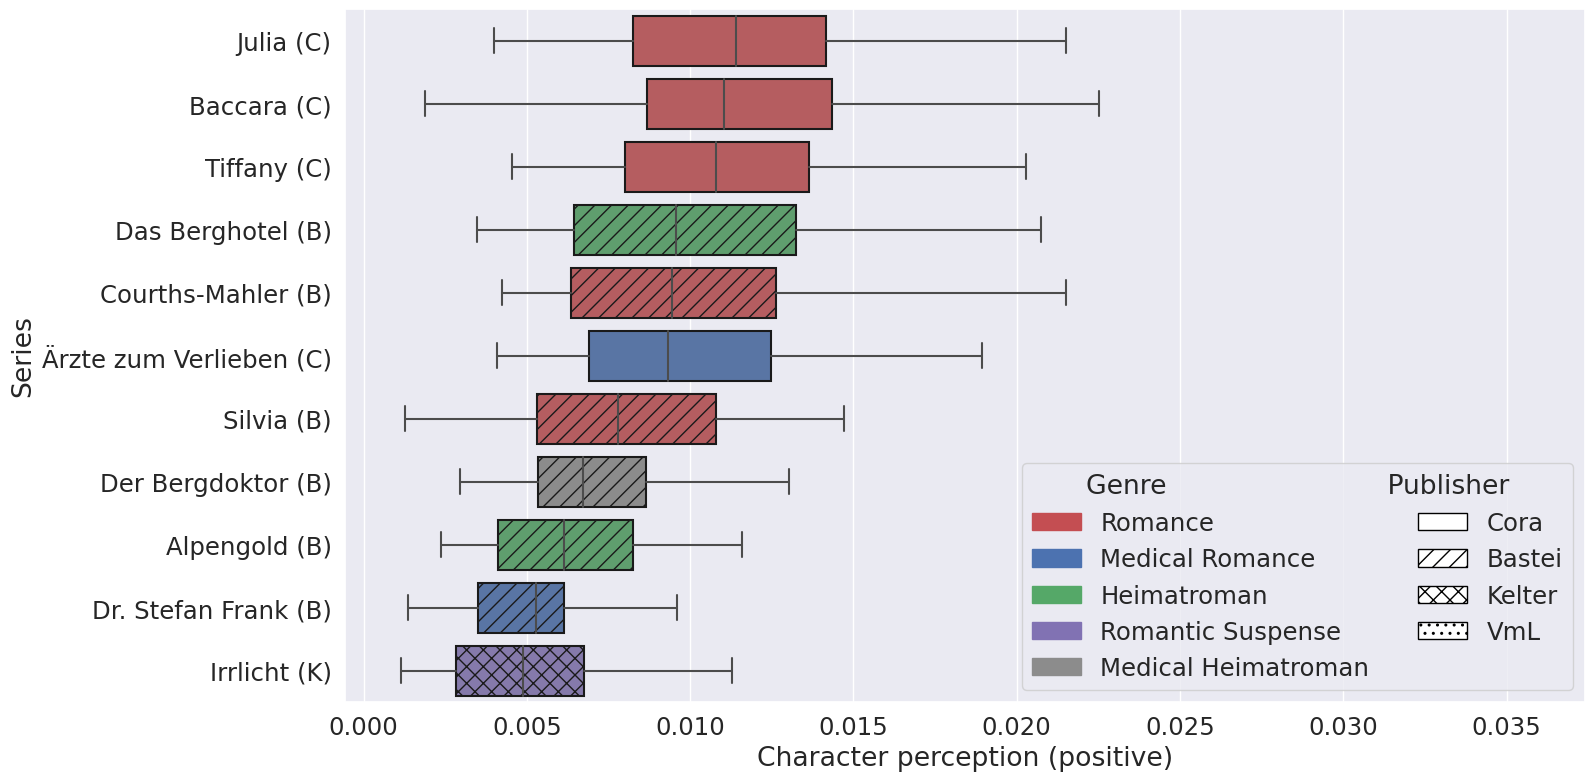

In [173]:
fig, ax = plt.subplots(figsize=(16,9))

order = data.groupby("Series").median("Char_pos_mean").sort_values("Char_pos_mean").index[::-1]


sns.boxplot(data=data, y="Series", x="Char_pos_mean", order=order, fliersize=0, palette=colordicts)

patches = []
for k in colordict.keys():
    
    patches.append(mpatches.Patch(color=colordict[k], label=trans[k]))
    plt.legend(handles=patches)

# select the correct patches
patches = [patch for patch in ax.patches]
hatches = [hatchedict[x] for x in [list(data[data.Series == x].Publisher)[0] for x in order]]
# the number of patches should be evenly divisible by the number of hatches
h = hatches * (len(patches) // len(hatches))
# iterate through the patches for each subplot
for patch, hatch in zip(patches, h):
    patch.set_hatch(hatch)
    patch.set_edgecolor('k')


patches =[]
for k in colordict.keys():
    
    patches.append(mpatches.Patch(color=colordict[k], label=trans[k]))
    plt.legend(handles=patches)
    
for k in hatchedict.keys():
    
    patches.append(mpatches.Patch(hatch=hatchedict[k], label=k, facecolor="white", edgecolor="black"))
    
plt.legend(title="Genre                          Publisher",ncol=2, handles=patches)

    
plt.xlabel("Character perception (positive)")
plt.savefig("plots/Character_perception_positive.png", dpi=300, bbox_inches="tight", format="png")
plt.show()

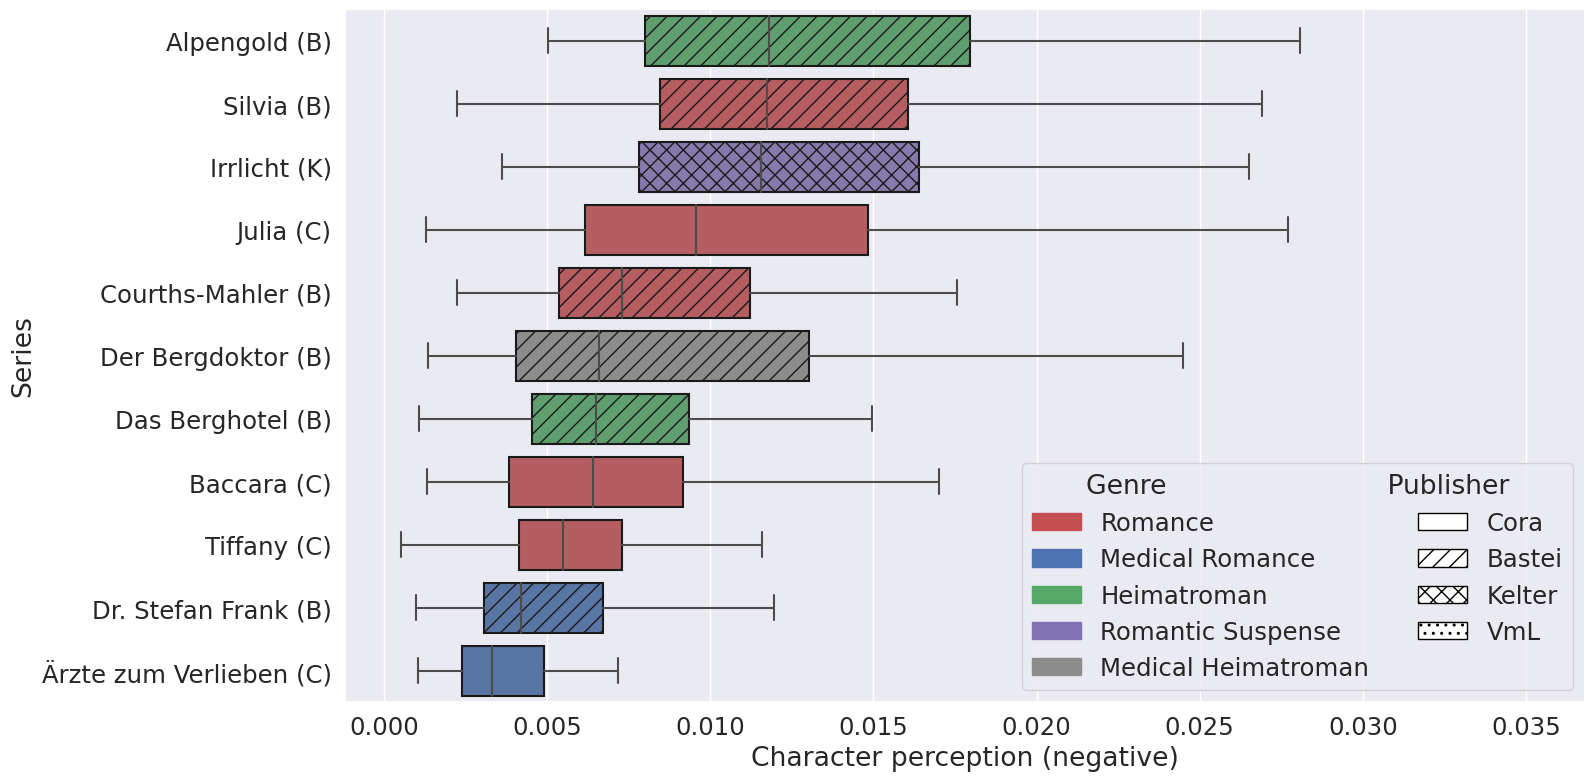

In [174]:
fig, ax = plt.subplots(figsize=(16,9))

order = data.groupby("Series").median("Char_neg_mean").sort_values("Char_neg_mean").index[::-1]


sns.boxplot(data=data, y="Series", x="Char_neg_mean", order=order, fliersize=0, palette=colordicts)

patches = []
for k in colordict.keys():
    
    patches.append(mpatches.Patch(color=colordict[k], label=trans[k]))
    plt.legend(handles=patches)

# select the correct patches
patches = [patch for patch in ax.patches]
hatches = [hatchedict[x] for x in [list(data[data.Series == x].Publisher)[0] for x in order]]
# the number of patches should be evenly divisible by the number of hatches
h = hatches * (len(patches) // len(hatches))
# iterate through the patches for each subplot
for patch, hatch in zip(patches, h):
    patch.set_hatch(hatch)
    patch.set_edgecolor('k')


patches =[]
for k in colordict.keys():
    
    patches.append(mpatches.Patch(color=colordict[k], label=trans[k]))
    plt.legend(handles=patches)
    
for k in hatchedict.keys():
    
    patches.append(mpatches.Patch(hatch=hatchedict[k], label=k, facecolor="white", edgecolor="black"))
    
plt.legend(title="Genre                          Publisher",ncol=2, handles=patches)

    
plt.xlabel("Character perception (negative)")
plt.savefig("plots/Character_perception_negative.png", dpi=300, bbox_inches="tight", format="png")
plt.show()

In [175]:
series_y = {"Emotion_pos_series":"Inner Emotions (positive)",
            "Emotion_neg_series":"Inner Emotions (negative)",
            "Attraction_series":"Physical Attraction",
            "Body_pos_series":"Physical Perception (positive)",
            "Body_neg_series":"Physical Perception (negative)",
            "Char_pos_series":"Character Perception (positive)",
            "Char_neg_series":"Character Perception (negative)",
            "ME_series":"Meetings",
            "HE_series":"Happy End",
            "CO_series":"Consent"}

def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m, m-h, m+h

for focus in ["Das Berghotel","Alpengold","Julia","Silvia Duett"]:
    
    print(focus)
    arzt = [to_array(x) for x in np.stack(data[data.Genre == "arzt"][focus])]
    liebe = [to_array(x) for x in np.stack(data[data.Genre == "liebe"][focus])]
    heimat = [to_array(x) for x in np.stack(data[data.Genre == "heimat"][focus])]
    romsus = [to_array(x) for x in np.stack(data[data.Genre == "romantic suspense"][focus])]
    overall = [to_array(x) for x in np.stack(data[focus])]
    
    arzt = np.mean([x for x in arzt if type(x) != int], axis=0)
    liebe = np.mean([x for x in liebe if type(x) != int], axis=0)
    heimat = np.mean([x for x in heimat if type(x) != int], axis=0)
    overall = np.mean([x for x in overall if type(x) != int], axis=0)

    fig, ax = plt.subplots(figsize=(16,9))

    plt.plot(arzt, label="Doctoral", color=colordict["arzt"], linewidth=3)
    plt.plot(liebe, label="Love", color=colordict["liebe"], linewidth=5)
    plt.plot(heimat, label="Rural", color=colordict["heimat"], linewidth=5)
    #plt.plot(heimat, label="Romantic Suspense", color=colordict["romantic suspense"], linewidth=5)
    plt.plot(overall, label="Corpus", color="black", linewidth=8)
    
    
    plt.legend(loc="upper center", ncol=3)
    plt.xlabel("Szenenverlauf")
    plt.ylabel(series_y[focus])
    ax.set_xticklabels([])
    plt.savefig("genre_time_"+focus+".png", dpi=300, bbox_inches="tight", format="png")
    
    plt.show()

Das Berghotel


KeyError: 'Das Berghotel'

In [176]:
series_y = {"Emotion_pos_series":"Inner Emotions (positive)",
            "Emotion_neg_series":"Inner Emotions (negative)",
            "Attraction_series":"Physical Attraction",
            "Body_pos_series":"Physical Perception (positive)",
            "Body_neg_series":"Physical Perception (negative)",
            "Char_pos_series":"Character Perception (positive)",
            "Char_neg_series":"Character Perception (negative)",
            "ME_series":"Meetings",
            "HE_series":"Happy End",
            "CO_series":"Consent"}

def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m, m-h, m+h

for focus in ["Emotion_neg_series"]:
    
    for pick in ["Baccara", "Alpengold", "Silvia"]:
    

        pickdata_raw = [to_array(x) for x in np.stack(data[data.Series == pick][focus])]
        overall = [to_array(x) for x in np.stack(data[focus])]

        pickdata = np.mean([x for x in pickdata_raw if type(x) != int], axis=0)
        overall = np.mean([x for x in overall if type(x) != int], axis=0)
        y = pickdata
        x = np.arange(0,len(y),1)
        ci = 1.96 * np.std(y)/np.sqrt(len(y))
        
        fig, ax = plt.subplots(figsize=(16,9))

        plt.plot(pickdata, label=pick, color=colordicts[pick], linewidth=3)
        plt.plot(overall, label="Corpus", color="black", linewidth=8)
        plt.fill_between(x, (y-ci), (y+ci), color=colordicts[pick], alpha=.1)

        plt.legend(loc="upper center", ncol=3)
        plt.xlabel("Szenenverlauf")
        plt.ylabel(series_y[focus])
        ax.set_xticklabels([])
        #plt.savefig("genre_time_"+focus+"_"+pick+".png", dpi=300, bbox_inches="tight", format="png")

        plt.show()
        


ValueError: need at least one array to stack

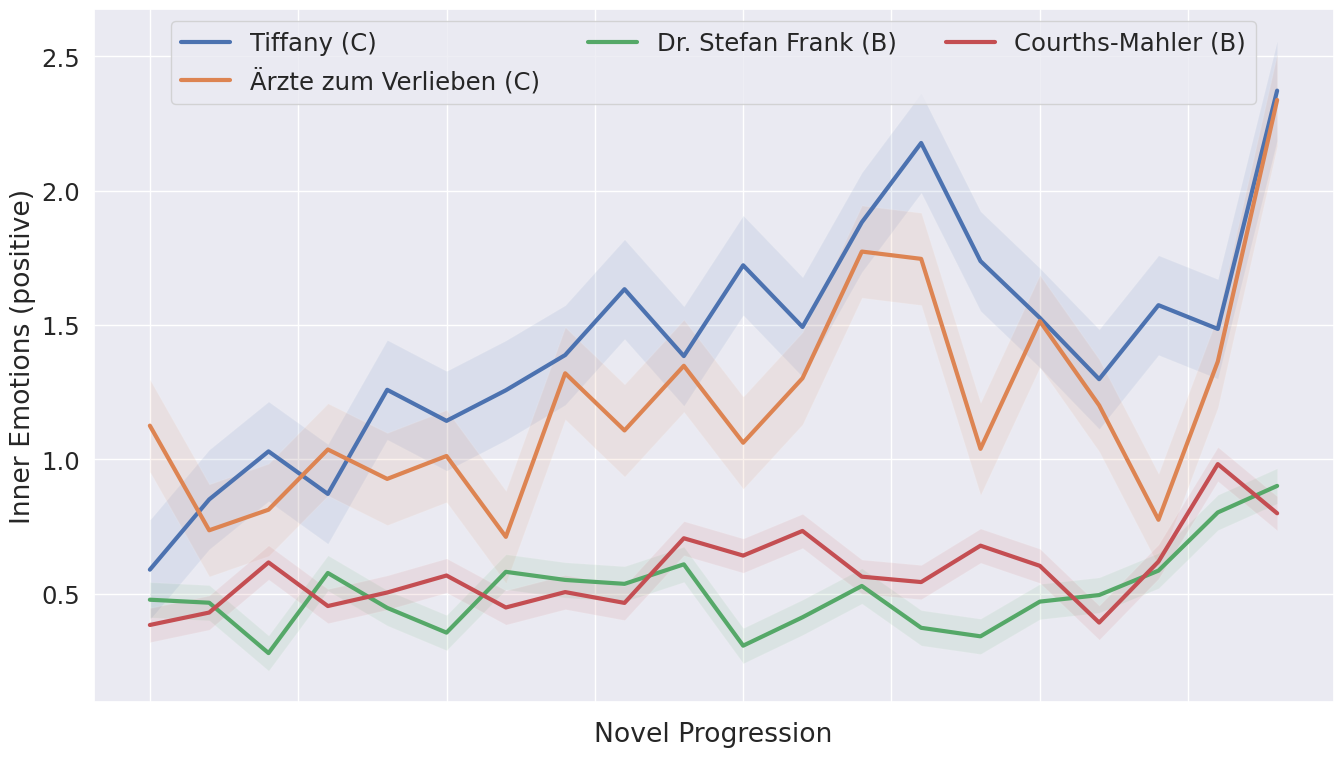

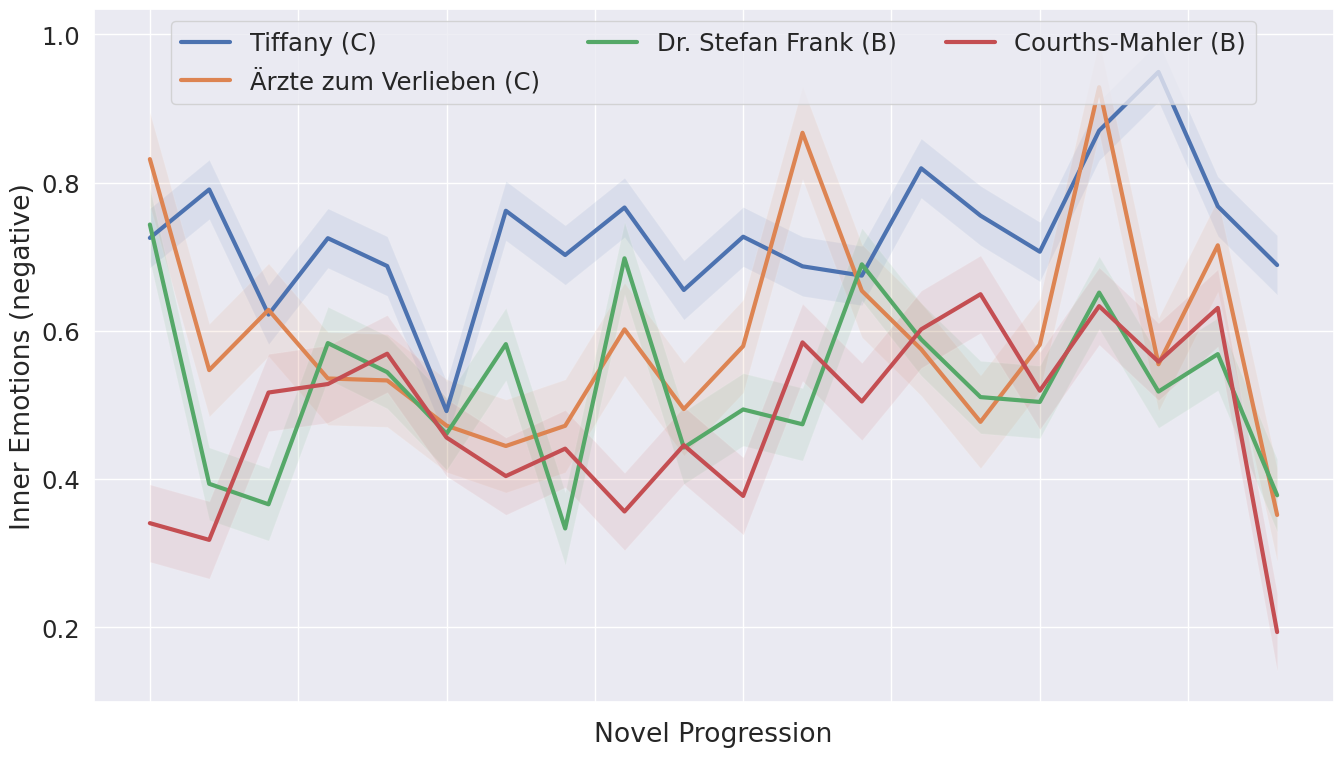

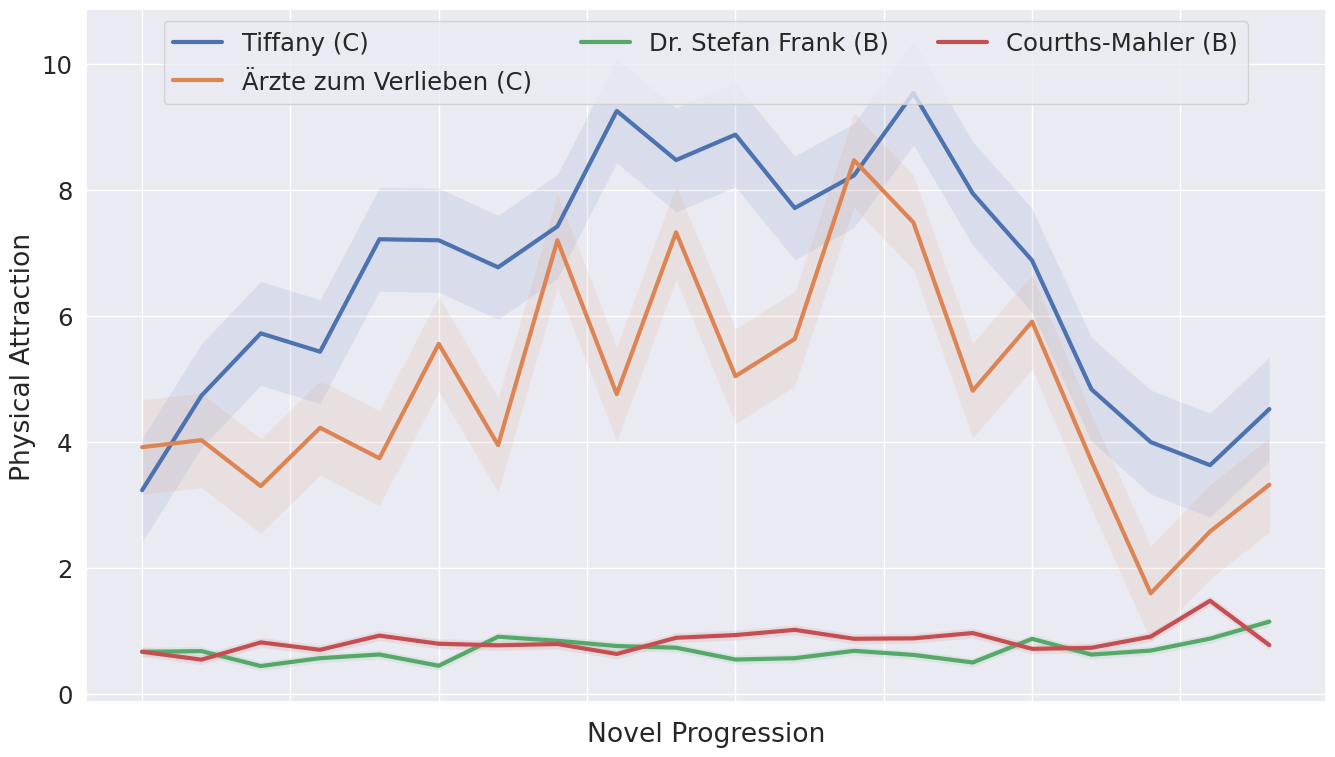

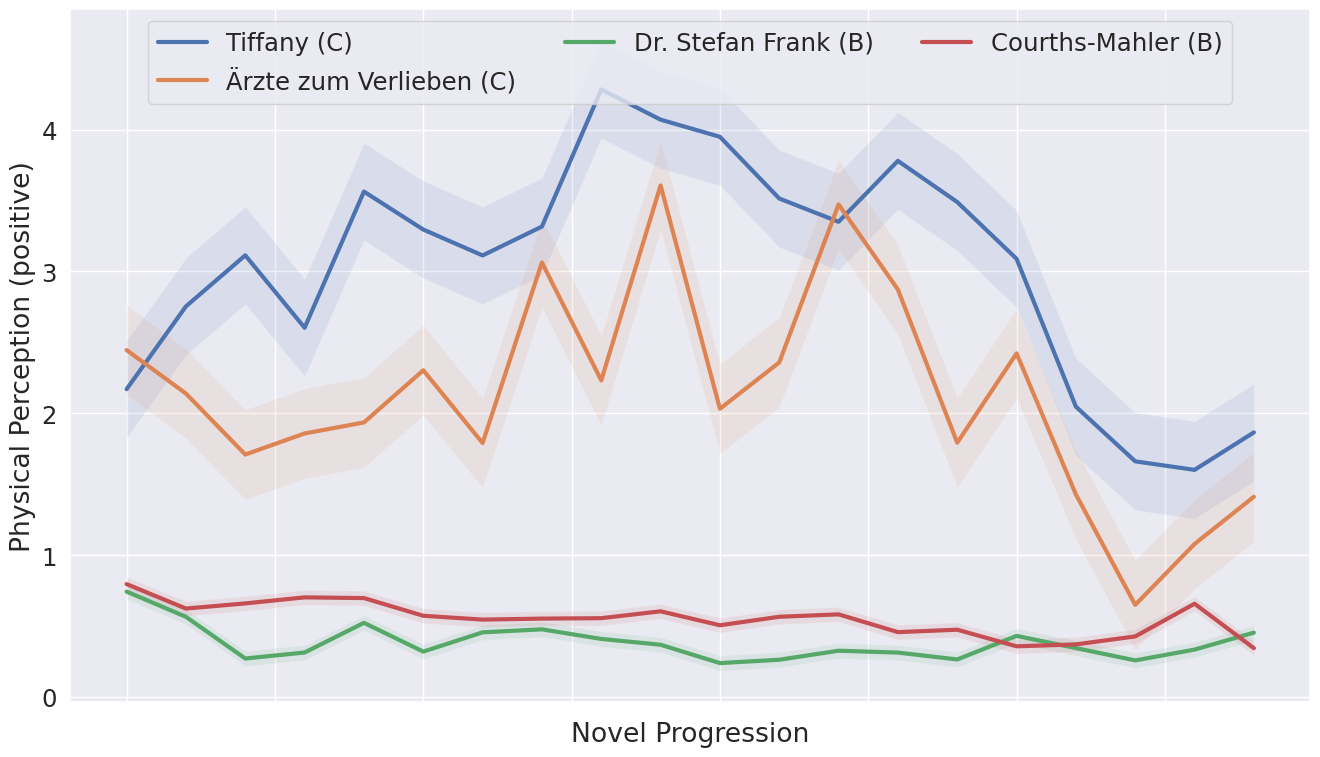

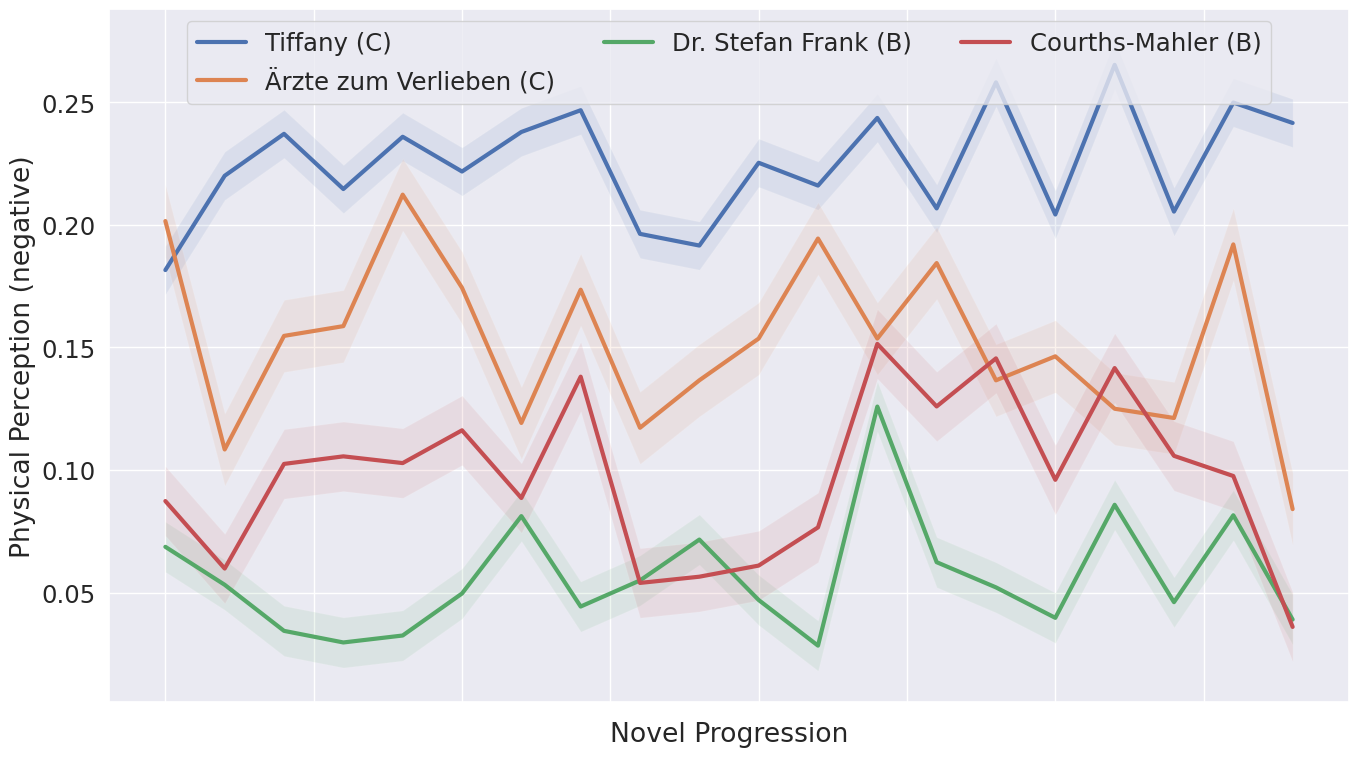

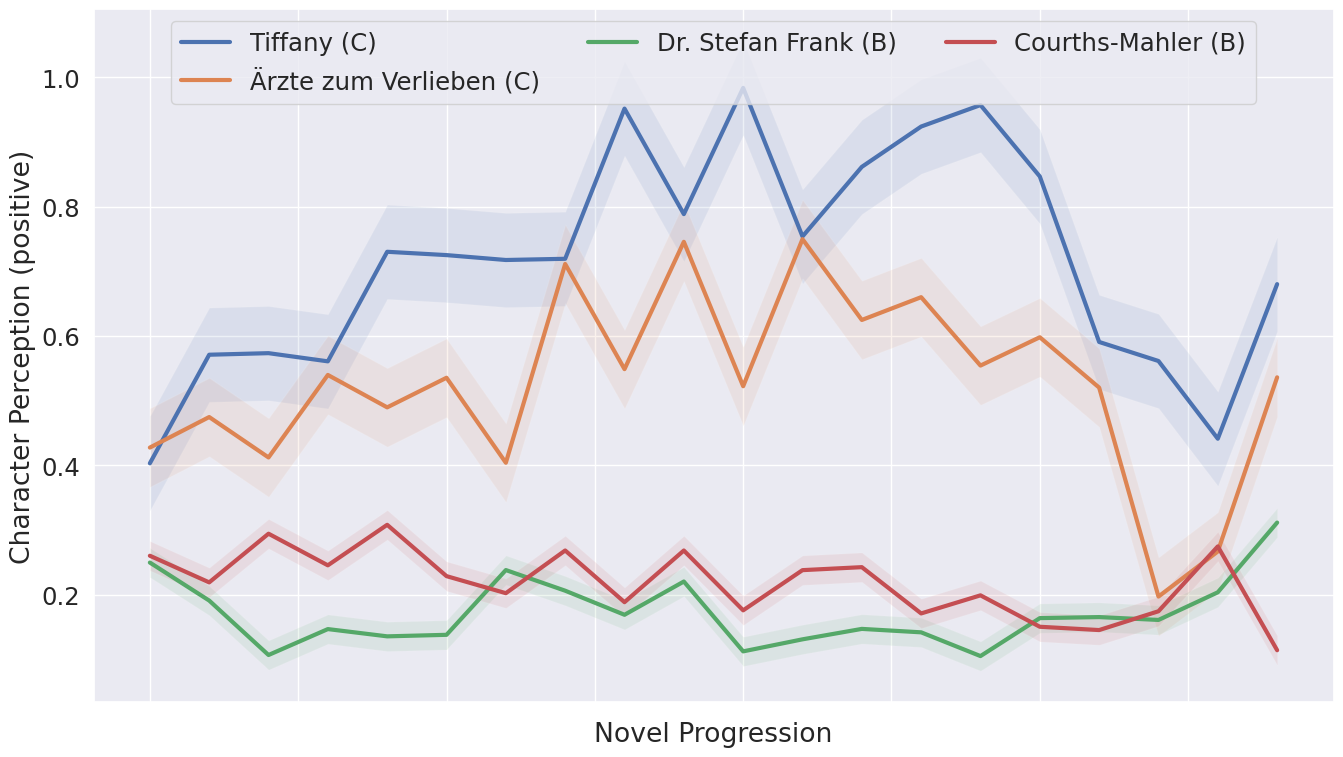

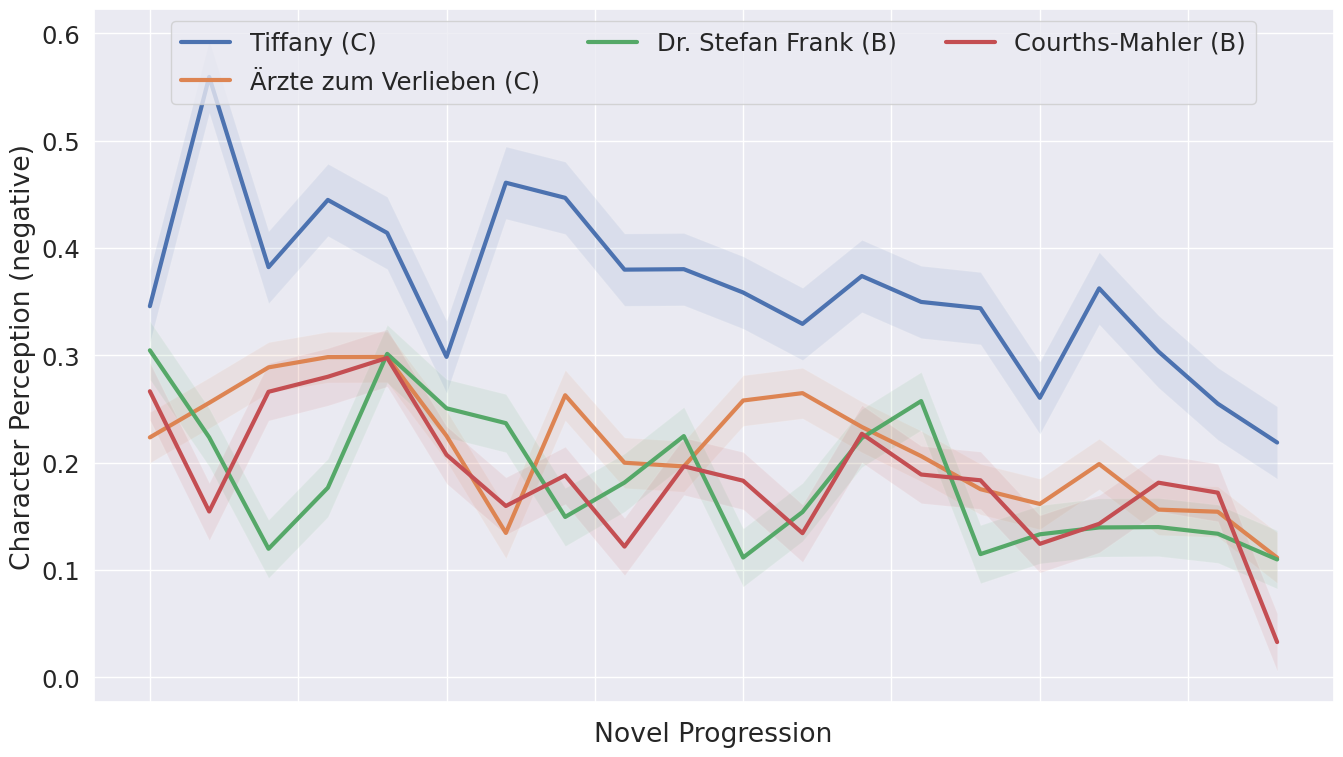

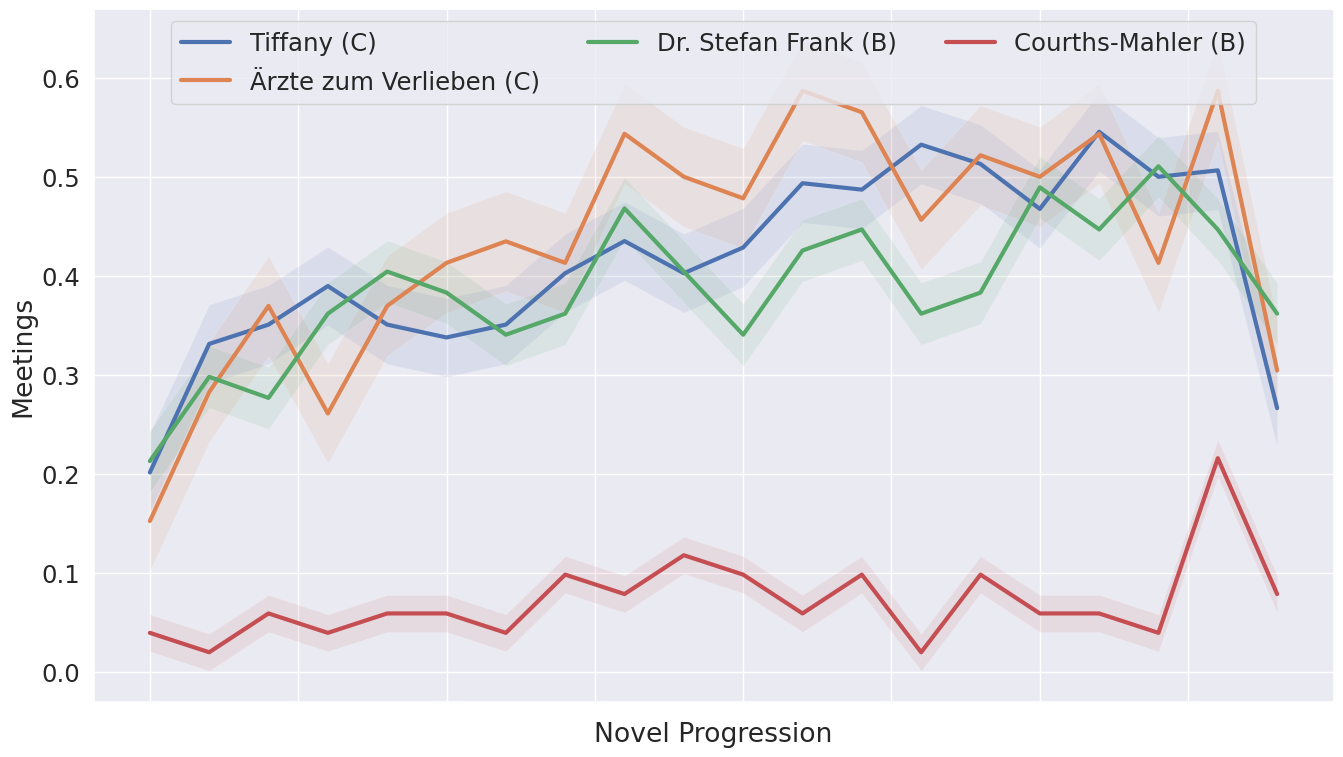

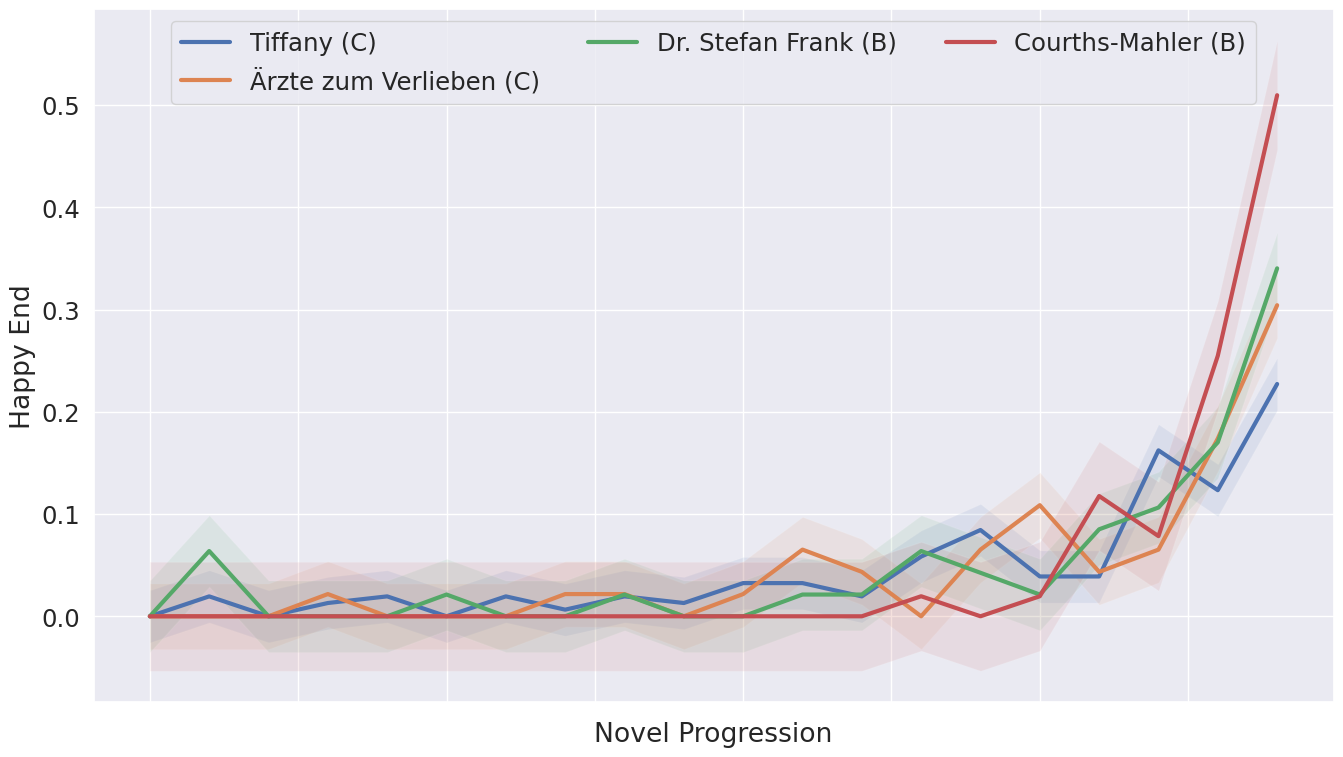

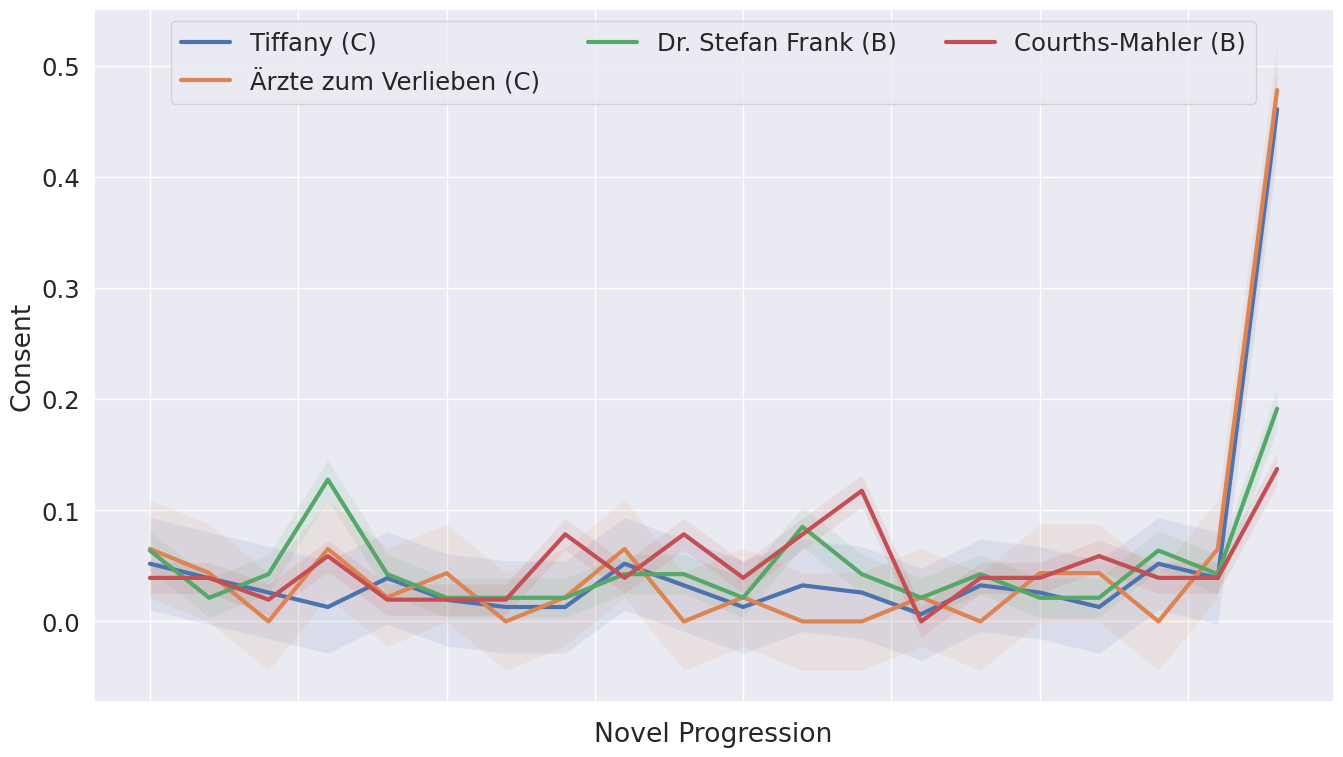

In [199]:
series_y = {"Emotion_pos_series":"Inner Emotions (positive)",
            "Emotion_neg_series":"Inner Emotions (negative)",
            "Attraction_series":"Physical Attraction",
            "Body_pos_series":"Physical Perception (positive)",
            "Body_neg_series":"Physical Perception (negative)",
            "Char_pos_series":"Character Perception (positive)",
            "Char_neg_series":"Character Perception (negative)",
            "ME_series":"Meetings",
            "HE_series":"Happy End",
            "CO_series":"Consent"}

def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m, m-h, m+h

for focus in series_y.keys():
    fig, ax = plt.subplots(figsize=(16,9))
    
    for pick in ["Tiffany (C)","Ärzte zum Verlieben (C)", "Dr. Stefan Frank (B)","Courths-Mahler (B)"]:
    

        pickdata_raw = [to_array(x) for x in np.stack(data[data.Series == pick][focus])]
        overall = [to_array(x) for x in np.stack(data[focus])]

        pickdata = np.mean([x for x in pickdata_raw if type(x) != int], axis=0)
        overall = np.mean([x for x in overall if type(x) != int], axis=0)
        y = pickdata
        x = np.arange(0,len(y),1)
        ci = 1.96 * np.std(y)/np.sqrt(len(y))
        


        plt.plot(pickdata, label=pick, linewidth=3)
        #plt.plot(overall, label="Corpus", color="black", linewidth=8)
        plt.fill_between(x, (y-ci), (y+ci), alpha=.1)

        plt.legend(loc="upper center", ncol=3)
        plt.xlabel("Novel Progression")
        plt.ylabel(series_y[focus])
        ax.set_xticklabels([])
        plt.savefig("plots/all_series_time"+focus+".png", dpi=300, bbox_inches="tight", format="png")

    plt.show()
        

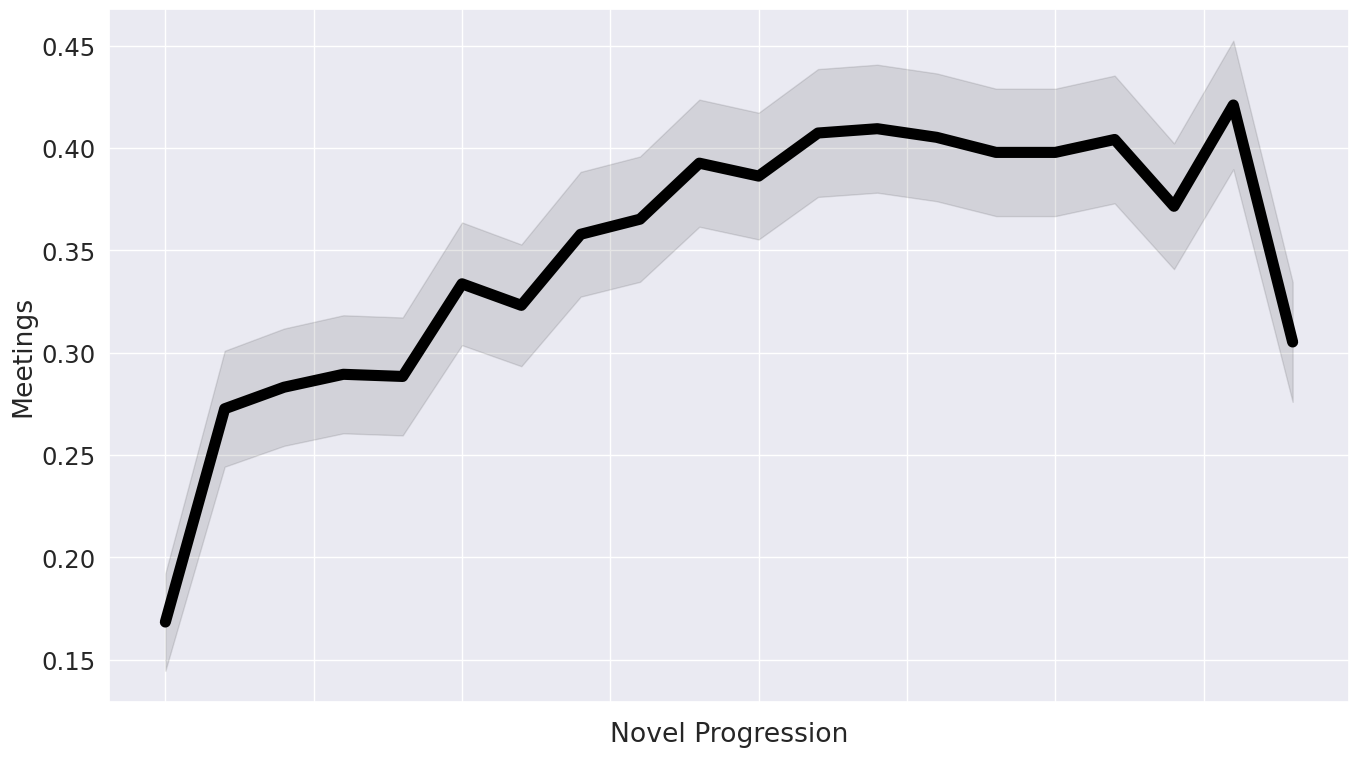

In [27]:
series_y = {"Emotion_pos_series":"Inner Emotions (positive)",
            "Emotion_neg_series":"Inner Emotions (negative)",
            "Attraction_series":"Physical Attraction",
            "Body_pos_series":"Physical Perception (positive)",
            "Body_neg_series":"Physical Perception (negative)",
            "Char_pos_series":"Character Perception (positive)",
            "Char_neg_series":"Character Perception (negative)",
            "ME_series":"Meetings",
            "HE_series":"Happy End",
            "CO_series":"Consent"}


fig, ax = plt.subplots(figsize=(16, 9))

focus = "ME_series"
overall = [to_array(x) for x in np.stack(data[focus])]

y = np.array(overall).transpose()
x = np.arange(0,len(y),1)
ci = np.array([1.96*np.std(c)/np.sqrt(len(c)) for c in y])

overall = np.mean([x for x in overall if type(x) != int], axis=0)


ax.fill_between(x, (overall-ci), (overall+ci), color="black", alpha=.1)
ax.plot(overall, label="Corpus", color="black", linewidth=8)
ax.set_xticklabels([])
ax.set_ylabel(series_y[focus])
ax.set_xlabel("Novel Progression")
plt.show()

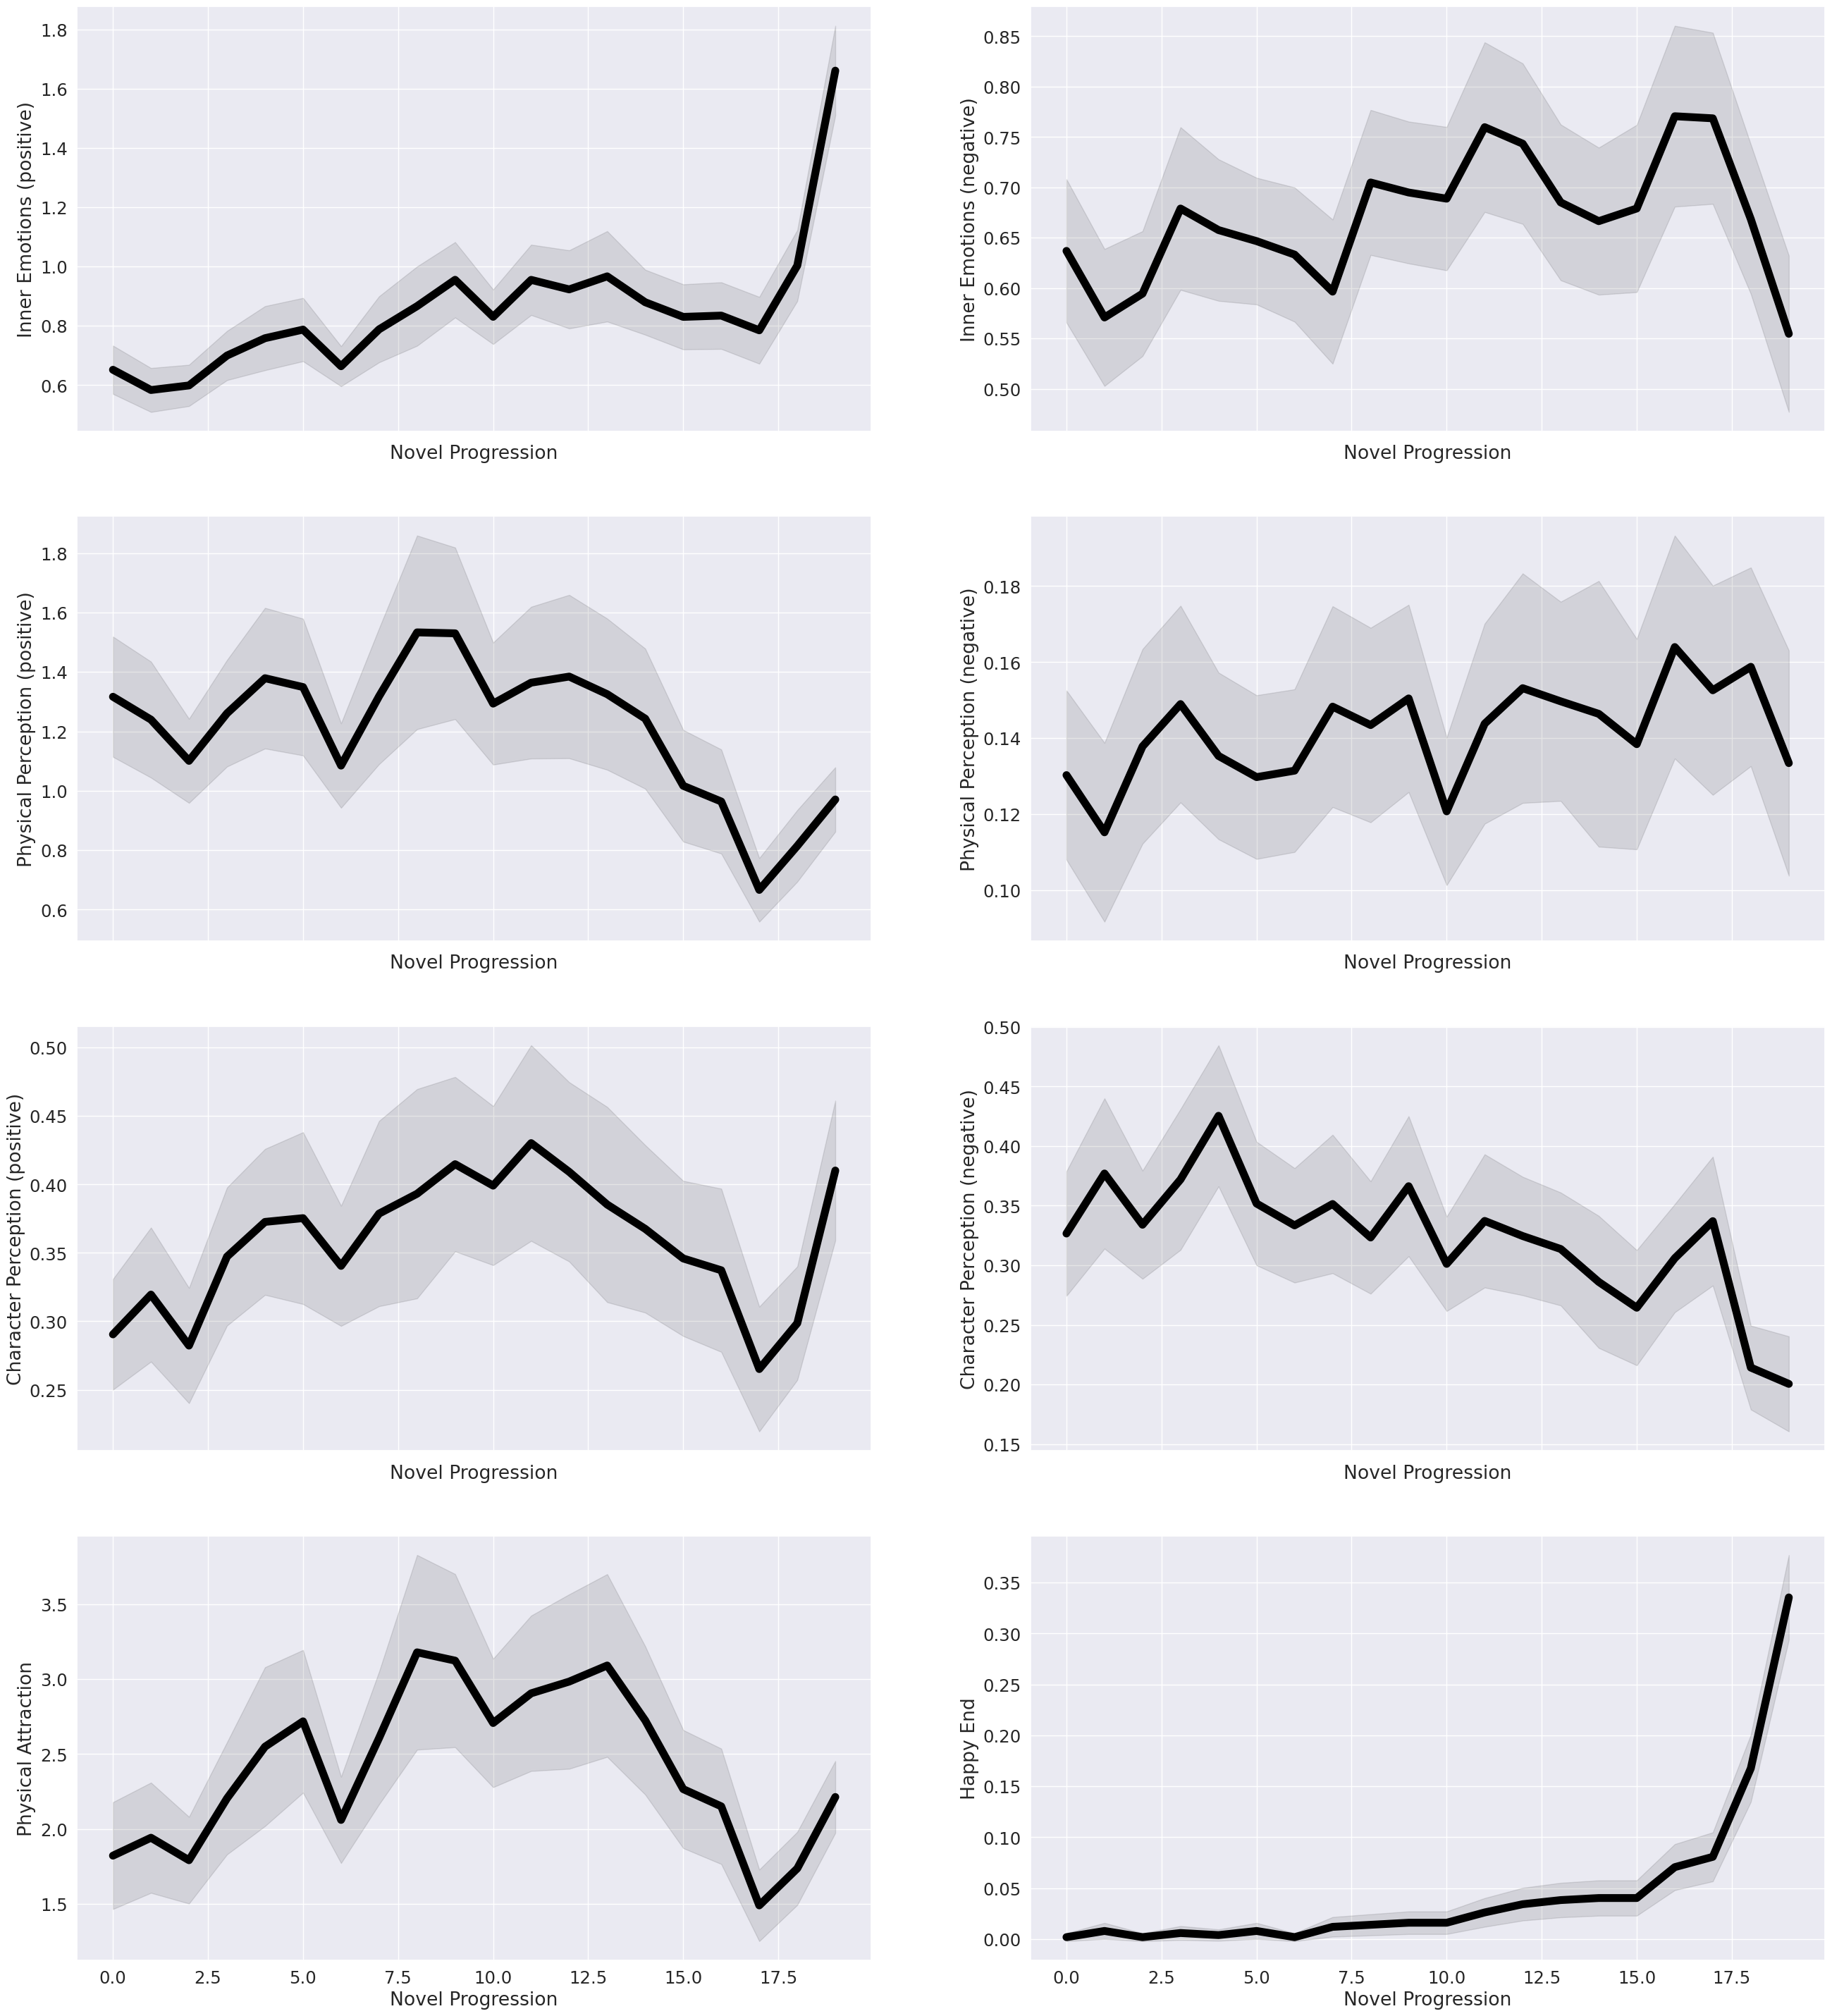

In [195]:
series_y = {"Emotion_pos_series":"Inner Emotions (positive)",
            "Emotion_neg_series":"Inner Emotions (negative)",
            "Attraction_series":"Physical Attraction",
            "Body_pos_series":"Physical Perception (positive)",
            "Body_neg_series":"Physical Perception (negative)",
            "Char_pos_series":"Character Perception (positive)",
            "Char_neg_series":"Character Perception (negative)",
            "ME_series":"Meetings",
            "HE_series":"Happy End",
            "CO_series":"Consent"}

# make it blue

def stratified_sample_df(df, col, n_samples):
    n = min(n_samples, df[col].value_counts().min())
    df_ = df.groupby(col).apply(lambda x: x.sample(n))
    df_.index = df_.index.droplevel(0)
    return df_

d = stratified_sample_df(data, "Series", 45)

fig, ax = plt.subplots(4,2, figsize=(16*2, 9*4))

focus = "Emotion_pos_series"

overall = [to_array(x) for x in np.stack(d[focus])]

y = np.array(overall).transpose()
x = np.arange(0,len(y),1)
ci = np.array([1.96*np.std(c)/np.sqrt(len(c)) for c in y])

overall = np.mean([x for x in overall if type(x) != int], axis=0)


ax[0,0].fill_between(x, (overall-ci), (overall+ci), color="black", alpha=.1)
ax[0,0].plot(overall, label="Corpus", color="black", linewidth=8)
ax[0,0].set_xticklabels([])
ax[0,0].set_ylabel(series_y[focus])
ax[0,0].set_xlabel("Novel Progression")

focus = "Emotion_neg_series"
overall = [to_array(x) for x in np.stack(d[focus])]

y = np.array(overall).transpose()
x = np.arange(0,len(y),1)
ci = np.array([1.96*np.std(c)/np.sqrt(len(c)) for c in y])

overall = np.mean([x for x in overall if type(x) != int], axis=0)


ax[0,1].fill_between(x, (overall-ci), (overall+ci), color="black", alpha=.1)
ax[0,1].plot(overall, label="Corpus", color="black", linewidth=8)
ax[0,1].set_xticklabels([])
ax[0,1].set_ylabel(series_y[focus])
ax[0,1].set_xlabel("Novel Progression")


focus = "Body_pos_series"
overall = [to_array(x) for x in np.stack(d[focus])]

y = np.array(overall).transpose()
x = np.arange(0,len(y),1)
ci = np.array([1.96*np.std(c)/np.sqrt(len(c)) for c in y])

overall = np.mean([x for x in overall if type(x) != int], axis=0)


ax[1,0].fill_between(x, (overall-ci), (overall+ci), color="black", alpha=.1)
ax[1,0].plot(overall, label="Corpus", color="black", linewidth=8)
ax[1,0].set_xticklabels([])
ax[1,0].set_ylabel(series_y[focus])
ax[1,0].set_xlabel("Novel Progression")


focus = "Body_neg_series"
overall = [to_array(x) for x in np.stack(d[focus])]

y = np.array(overall).transpose()
x = np.arange(0,len(y),1)
ci = np.array([1.96*np.std(c)/np.sqrt(len(c)) for c in y])

overall = np.mean([x for x in overall if type(x) != int], axis=0)


ax[1,1].fill_between(x, (overall-ci), (overall+ci), color="black", alpha=.1)
ax[1,1].plot(overall, label="Corpus", color="black", linewidth=8)
ax[1,1].set_xticklabels([])
ax[1,1].set_ylabel(series_y[focus])
ax[1,1].set_xlabel("Novel Progression")


focus = "Char_pos_series"
overall = [to_array(x) for x in np.stack(d[focus])]

y = np.array(overall).transpose()
x = np.arange(0,len(y),1)
ci = np.array([1.96*np.std(c)/np.sqrt(len(c)) for c in y])

overall = np.mean([x for x in overall if type(x) != int], axis=0)


ax[2,0].fill_between(x, (overall-ci), (overall+ci), color="black", alpha=.1)
ax[2,0].plot(overall, label="Corpus", color="black", linewidth=8)
ax[2,0].set_xticklabels([])
ax[2,0].set_ylabel(series_y[focus])
ax[2,0].set_xlabel("Novel Progression")

focus = "Char_neg_series"
overall = [to_array(x) for x in np.stack(d[focus])]

y = np.array(overall).transpose()
x = np.arange(0,len(y),1)
ci = np.array([1.96*np.std(c)/np.sqrt(len(c)) for c in y])

overall = np.mean([x for x in overall if type(x) != int], axis=0)


ax[2,1].fill_between(x, (overall-ci), (overall+ci), color="black", alpha=.1)
ax[2,1].plot(overall, label="Corpus", color="black", linewidth=8)
ax[2,1].set_xticklabels([])
ax[2,1].set_ylabel(series_y[focus])
ax[2,1].set_xlabel("Novel Progression")

focus = "Attraction_series"
overall = [to_array(x) for x in np.stack(d[focus])]

y = np.array(overall).transpose()
x = np.arange(0,len(y),1)
ci = np.array([1.96*np.std(c)/np.sqrt(len(c)) for c in y])

overall = np.mean([x for x in overall if type(x) != int], axis=0)

ax[3,0].fill_between(x, (overall-ci), (overall+ci), color="black", alpha=.1)
ax[3,0].plot(overall, label="Corpus", color="black", linewidth=8)
ax[3,0].set_ylabel(series_y[focus])
ax[3,0].set_xlabel("Novel Progression")


focus = "HE_series"
overall = [to_array(x) for x in np.stack(d[focus])]

y = np.array(overall).transpose()
x = np.arange(0,len(y),1)
ci = np.array([1.96*np.std(c)/np.sqrt(len(c)) for c in y])

overall = np.mean([x for x in overall if type(x) != int], axis=0)

ax[3,1].fill_between(x, (overall-ci), (overall+ci), color="black", alpha=.1)
ax[3,1].plot(overall, label="Corpus", color="black", linewidth=8)
ax[3,1].set_ylabel(series_y[focus])
ax[3,1].set_xlabel("Novel Progression")


fig.savefig("plots/grid_plot.png", dpi=300, format="png", bbox_inches="tight")
fig.show()

In [194]:
len(d)

495

In [37]:
from dtaidistance.dtw_ndim import distance
from umap import UMAP

/home/konle/anaconda3/envs/gpu/lib/python3.9/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/konle/anaconda3/envs/gpu/lib/python3.9/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/konle/anaconda3/envs/gpu/lib/python3.9/site-packages/umap/distances.py:108

In [38]:
mdat = []
for index, row in data.loc[:, seriesfields].iterrows():
    
    mdat.append(np.array([to_array(x) for x in row]).transpose())

distances = []
for s1 in tqdm(mdat):
    for s2 in mdat:
        
        distances.append(distance(s1, s2))

mdist = np.array(distances).reshape(len(mdat),len(mdat))

  0%|          | 0/950 [00:00<?, ?it/s]

In [17]:
cdat = []
for index, row in data.loc[:, seriesfields[:-2]].iterrows():
    
    cdat.append(np.array([np.mean(to_array(x)) for x in row]).flatten())

In [19]:
from sklearn.model_selection import cross_validate, StratifiedKFold, cross_val_score
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, make_scorer
from sklearn.metrics import confusion_matrix
from sklearn.feature_selection import RFE

X = cdat
Y = data.Publisher

clf = SVC(kernel='linear', C=1000, random_state=0)

scoring = ['f1_macro']
scores = cross_validate(clf, X, Y, scoring=scoring)
print(np.mean(scores["test_f1_macro"]))
print(np.std(scores["test_f1_macro"]))

0.8549598996696124
0.03704167381265299


In [223]:
X = cdat
Y = data.Publisher

clf = SVC(kernel='linear', C=1000, random_state=0)

selector = RFE(clf, n_features_to_select=6, step=1)
selector = selector.fit(X, Y)
res = pd.DataFrame()
res["rank"] = selector.ranking_
res["Feature"] = seriesfields[:-2]
res.sort_values("rank")

rank             Feature
1     1  Emotion_neg_series
2     1   Attraction_series
3     1     Body_pos_series
4     1     Body_neg_series
5     1     Char_pos_series
7     1           ME_series
0     2  Emotion_pos_series
6     3     Char_neg_series

In [ ]:
# wie nürtlich sit welches feature ? Serien/Verlage

In [15]:
X = cdat
Y = data.Genre

clf = SVC(kernel='linear', C=1000, random_state=0)

selector = RFE(clf, n_features_to_select=2, step=1)
selector = selector.fit(X, Y)
res = pd.DataFrame()
res["rank"] = selector.ranking_
res["Feature"] = seriesfields[:-2]
res.sort_values("rank")

NameError: name 'cdat' is not defined

In [181]:
# Variables for average classification report
originalclass = []
predictedclass = []

#Make our customer score
def classification_report_with_accuracy_score(y_true, y_pred):
    originalclass.extend(y_true)
    predictedclass.extend(y_pred)
    return accuracy_score(y_true, y_pred) # return accuracy score

inner_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
outer_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

# Non_nested parameter search and scoring
clf = SVC(kernel='linear', C=1000, random_state=0)

# Nested CV with parameter optimization
nested_score = cross_val_score(clf, X=X, y=Y, cv=outer_cv, scoring=make_scorer(classification_report_with_accuracy_score))

# Average values in classification report for all folds in a K-fold Cross-validation  
print(classification_report(originalclass, predictedclass)) 

              precision    recall  f1-score   support

      Bastei       0.87      0.93      0.90       308
        Cora       0.97      0.97      0.97       586
      Kelter       0.81      0.52      0.63        56

    accuracy                           0.93       950
   macro avg       0.88      0.80      0.83       950
weighted avg       0.93      0.93      0.92       950



In [250]:
from sklearn.model_selection import cross_validate
from sklearn.svm import SVC

d = stratified_sample_df(data, "Series", 45)

cdat = []
for index, row in d.loc[:, seriesfields[:-2]].iterrows():
    
    cdat.append(np.array([np.mean(to_array(x)) for x in row]).flatten())

X = cdat
Y = d.Series

originalclass = []
predictedclass = []

#Make our customer score
def classification_report_with_accuracy_score(y_true, y_pred):
    originalclass.extend(y_true)
    predictedclass.extend(y_pred)
    return accuracy_score(y_true, y_pred) # return accuracy score

inner_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=2)
outer_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=2)

# Non_nested parameter search and scoring
clf = SVC(kernel='linear', C=1000, random_state=2)

# Nested CV with parameter optimization
nested_score = cross_val_score(clf, X=X, y=Y, cv=outer_cv, scoring=make_scorer(classification_report_with_accuracy_score))

# Average values in classification report for all folds in a K-fold Cross-validation  
print(classification_report(originalclass, predictedclass)) 

                         precision    recall  f1-score   support

          Alpengold (B)       0.42      0.49      0.45        45
            Baccara (C)       0.25      0.33      0.29        45
     Courths-Mahler (B)       0.62      0.64      0.63        45
      Das Berghotel (B)       0.55      0.53      0.54        45
     Der Bergdoktor (B)       0.49      0.42      0.45        45
   Dr. Stefan Frank (B)       0.58      0.64      0.61        45
           Irrlicht (K)       0.60      0.58      0.59        45
              Julia (C)       0.47      0.38      0.42        45
             Silvia (B)       0.51      0.51      0.51        45
            Tiffany (C)       0.59      0.49      0.54        45
Ärzte zum Verlieben (C)       0.45      0.42      0.44        45

               accuracy                           0.49       495
              macro avg       0.50      0.49      0.50       495
           weighted avg       0.50      0.49      0.50       495



In [50]:
from sklearn.model_selection import cross_validate
from sklearn.svm import SVC
d = data[~data.Series.isin(["Der Bergdoktor (B)"])]
cdat = []
for index, row in d.loc[:, seriesfields[:-2]].iterrows():
    
    cdat.append(np.array([np.mean(to_array(x)) for x in row]).flatten())
    
X = cdat
Y = d.Genre

originalclass = []
predictedclass = []

#Make our customer score
def classification_report_with_accuracy_score(y_true, y_pred):
    originalclass.extend(y_true)
    predictedclass.extend(y_pred)
    return accuracy_score(y_true, y_pred) # return accuracy score

inner_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=2)
outer_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=2)

# Non_nested parameter search and scoring
clf = SVC(kernel='linear', C=1000, random_state=2)

# Nested CV with parameter optimization
nested_score = cross_val_score(clf, X=X, y=Y, cv=outer_cv, scoring=make_scorer(classification_report_with_accuracy_score))

# Average values in classification report for all folds in a K-fold Cross-validation  
print(classification_report(originalclass, predictedclass)) 

                   precision    recall  f1-score   support

             arzt       0.67      0.02      0.04        93
           heimat       0.53      0.30      0.38       100
            liebe       0.79      0.97      0.87       653
romantic suspense       0.82      0.59      0.69        56

         accuracy                           0.77       902
        macro avg       0.70      0.47      0.50       902
     weighted avg       0.75      0.77      0.72       902



In [251]:
m = confusion_matrix(originalclass, predictedclass)
m = pd.DataFrame(m)
m.columns = np.unique(originalclass)
m.index = np.unique(originalclass)

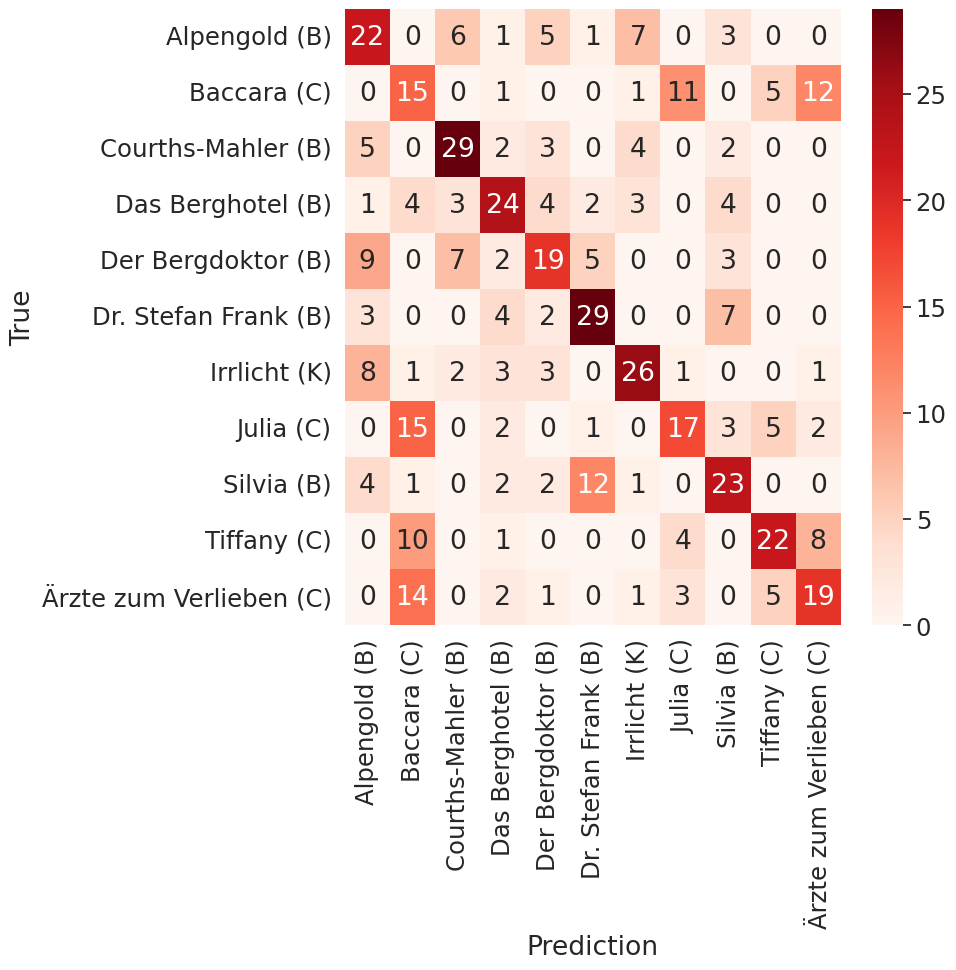

In [253]:
fig,ax = plt.subplots(figsize=(8,8))

sns.heatmap(m, cmap="Reds", annot=True)
plt.xlabel("Prediction")
plt.ylabel("True")
fig.savefig("plots/conf_series.png", dpi=300, format="png", bbox_inches="tight")
plt.show()

In [20]:
from sklearn.model_selection import cross_validate
from sklearn.svm import SVC

X = cdat
Y = data.Genre



originalclass = []
predictedclass = []

#Make our customer score
def classification_report_with_accuracy_score(y_true, y_pred):
    originalclass.extend(y_true)
    predictedclass.extend(y_pred)
    return accuracy_score(y_true, y_pred) # return accuracy score

inner_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
outer_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

# Non_nested parameter search and scoring
clf = SVC(kernel='linear', C=1000, random_state=0)

# Nested CV with parameter optimization
nested_score = cross_val_score(clf, X=X, y=Y, cv=outer_cv, scoring=make_scorer(classification_report_with_accuracy_score))

# Average values in classification report for all folds in a K-fold Cross-validation  
print(classification_report(originalclass, predictedclass)) 

                   precision    recall  f1-score   support

             arzt       0.56      0.05      0.10        93
           heimat       0.54      0.66      0.60       148
            liebe       0.83      0.90      0.86       653
romantic suspense       0.78      0.64      0.71        56

         accuracy                           0.77       950
        macro avg       0.68      0.57      0.57       950
     weighted avg       0.75      0.77      0.74       950



In [22]:
set(data.Genre)

{'arzt', 'heimat', 'liebe', 'romantic suspense'}

In [187]:
m = confusion_matrix(originalclass, predictedclass)
m = pd.DataFrame(m)
m.columns = ["arzt", "heimat", "liebe", "romantic\nsuspense "]
m.index = ["arzt", "heimat", "liebe", "romantic\nsuspense "]

In [188]:
m = m/m.sum()

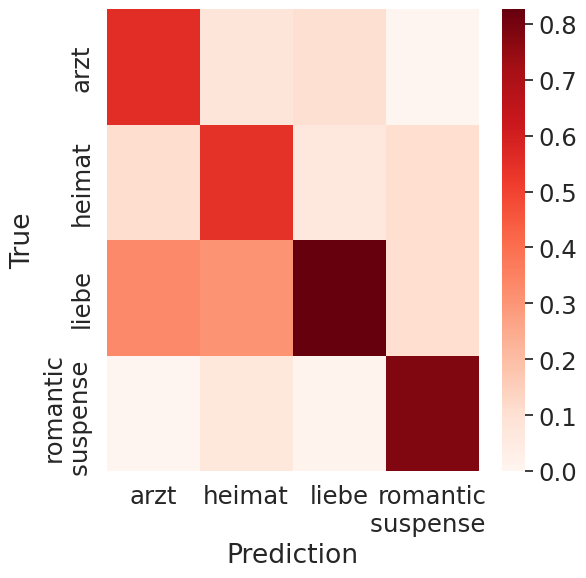

In [189]:
fig,ax = plt.subplots(figsize=(6,6))

sns.heatmap(m, cmap="Reds")
plt.xlabel("Prediction")
plt.ylabel("True")
plt.show()

In [48]:
Counter(data.Genre)

Counter({'liebe': 514, 'heimat': 104, 'arzt': 74, 'romantic suspense': 56})

In [40]:
dimred = UMAP(min_dist=0.8, metric="euclidean", n_neighbors=15)

In [41]:
vecs = dimred.fit_transform(mdist)

In [89]:
colorv

{'Bastei': 'blue', 'Cora': 'red', 'Kelter': 'green', 'VmL': 'grey'}

In [204]:
colordictv

{'Courths-Mahler (B)': 'blue',
 'Dr. Stefan Frank (B)': 'blue',
 'Baccara (C)': 'red',
 'Julia (C)': 'red',
 'Tiffany (C)': 'red',
 'Alpengold (B)': 'blue',
 'Silvia (B)': 'blue',
 'Das Berghotel (B)': 'blue',
 'Irrlicht (K)': 'green',
 'Der Bergdoktor (B)': 'blue',
 'Ärzte zum Verlieben (C)': 'red'}

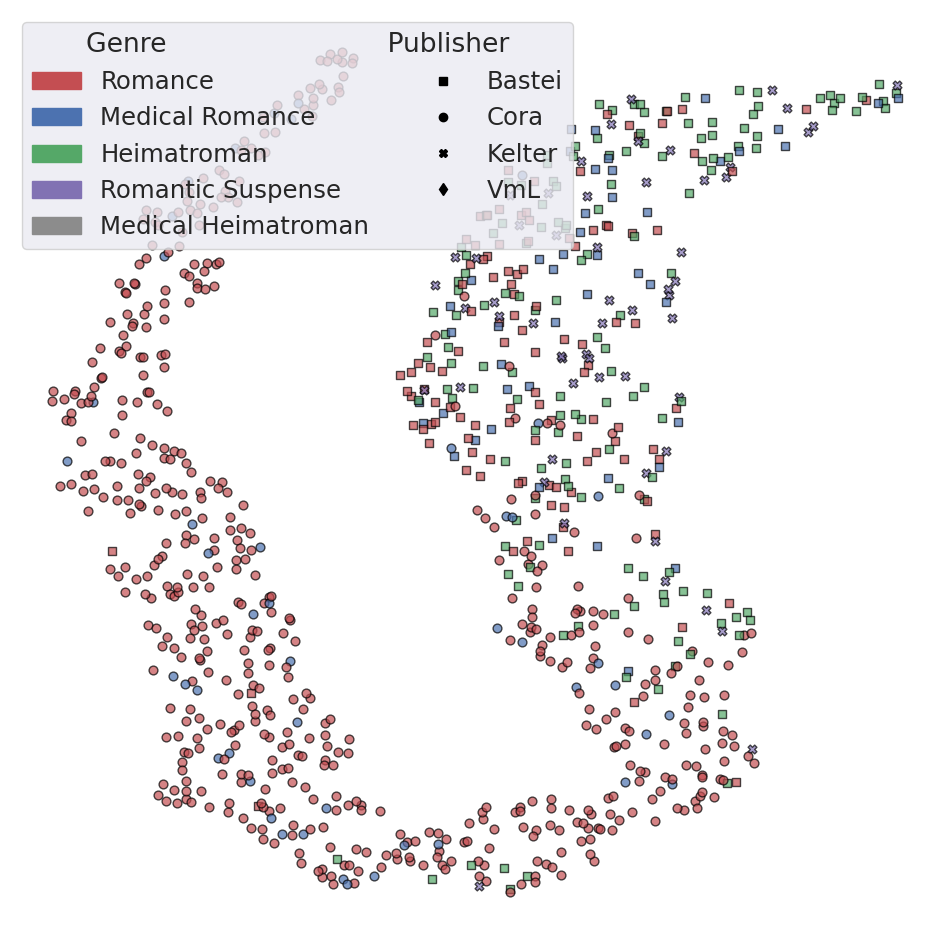

In [42]:
mdict = {'Bastei': "s", 
         'Cora': 'o', 
         'Kelter': "X", 
         'VmL': "d"}

fig, ax = plt.subplots(figsize=(12,12))

color = [colordict[x] for x in data.Genre]
m = [mdict[x] for x in data.Publisher]

for i in np.arange(0,len(vecs),1):
    
    ax.scatter(vecs[i,0], vecs[i,1], color=color[i], marker=m[i], edgecolor="black", s=40, alpha=0.7)

patches = []
for k in colordict.keys():
    
    patches.append(mpatches.Patch(color=colordict[k], label=trans[k]))

    
for k in mdict.keys():
    
    patches.append(plt.Line2D([], [], color="black", marker=mdict[k], linewidth=0, label=k))

ax.legend(title="Genre                          Publisher", ncol=2, handles=patches)

ax.axis("off")


fig.savefig("plots/scatter_gernes.png", dpi=300, bbox_inches="tight", format="png")
plt.show()

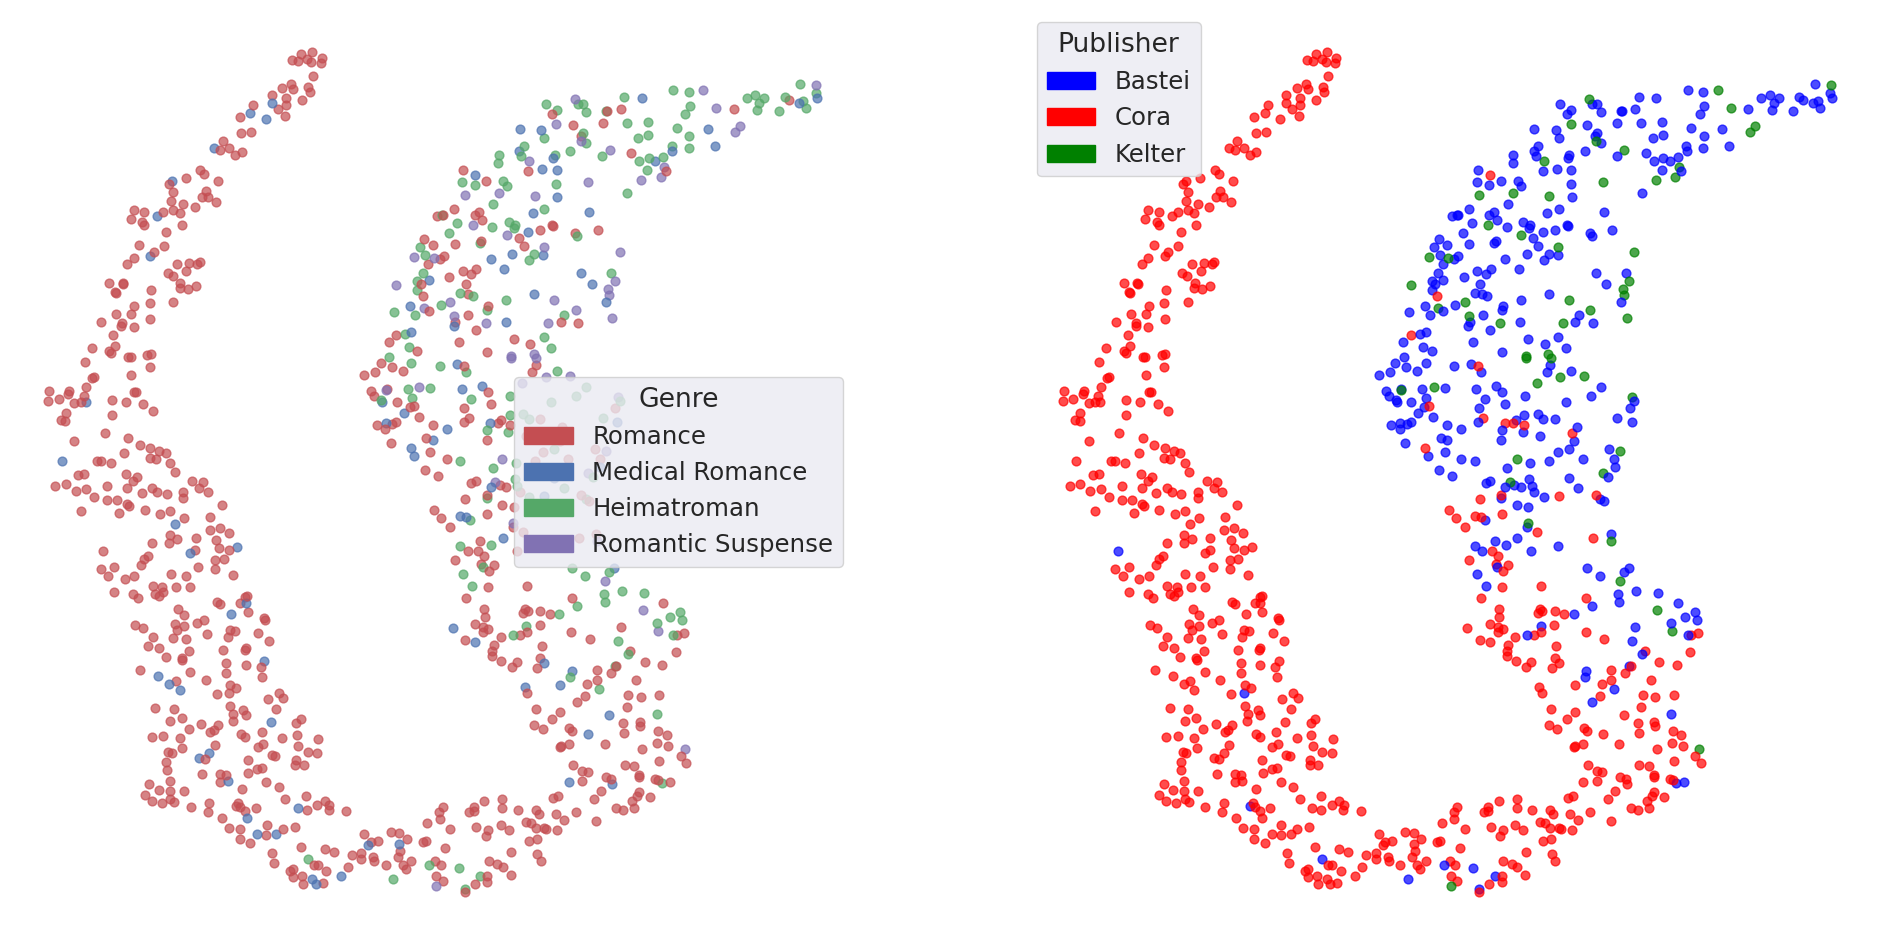

In [51]:
mdict = {'Bastei': "blue", 
         'Cora': 'red', 
         'Kelter': "green", 
         'VmL': "grey"}

fig, ax = plt.subplots(1,2, figsize=(24,12))


color = [colordict[x] for x in data.Genre]
m = [mdict[x] for x in data.Publisher]

for i in np.arange(0,len(vecs),1):
    
    ax[0].scatter(vecs[i,0], vecs[i,1], color=color[i], s=40, alpha=0.7)

patches = []
for k in colordict.keys():
    
    if trans[k] == "Medical Heimatroman":
        continue
        
    patches.append(mpatches.Patch(color=colordict[k], label=trans[k]))

ax[0].legend(title="Genre", handles=patches)

ax[0].axis("off")
    

color = [mdict[x] for x in data.Publisher]

for i in np.arange(0,len(vecs),1):
    
    ax[1].scatter(vecs[i,0], vecs[i,1], color=color[i], s=40, alpha=0.7)

patches = []
for k in mdict.keys():
    
    if k == "VmL":
        continue
        
    patches.append(mpatches.Patch(color=mdict[k], label=k))

ax[1].legend(title="Publisher", handles=patches)

ax[1].axis("off")

plt.savefig("plots/scatter_both.png",dpi=300,bbox_inches="tight")
plt.show()

In [134]:
scdata = pd.DataFrame(vecs)
scdata.columns = ["x","y"]
scdata["name"] = list(data.fname)
scdata["pub"] = list(data.Pubisher)

In [136]:
scdata[(scdata.pub == "Bastei") & (scdata.x < 0)]

x          y                                               name  \
180 -0.406088  17.812153  Verführung nach Plan$Karen Sanders$Siliva Gold...   

        pub  
180  Bastei

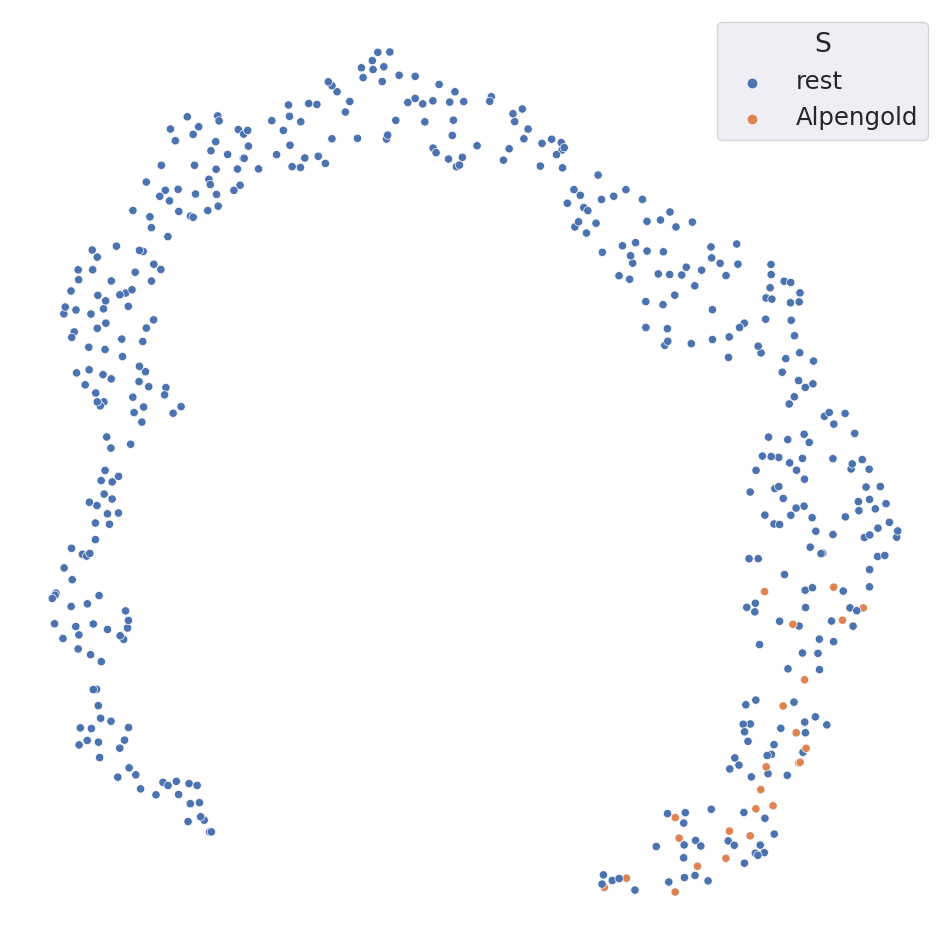

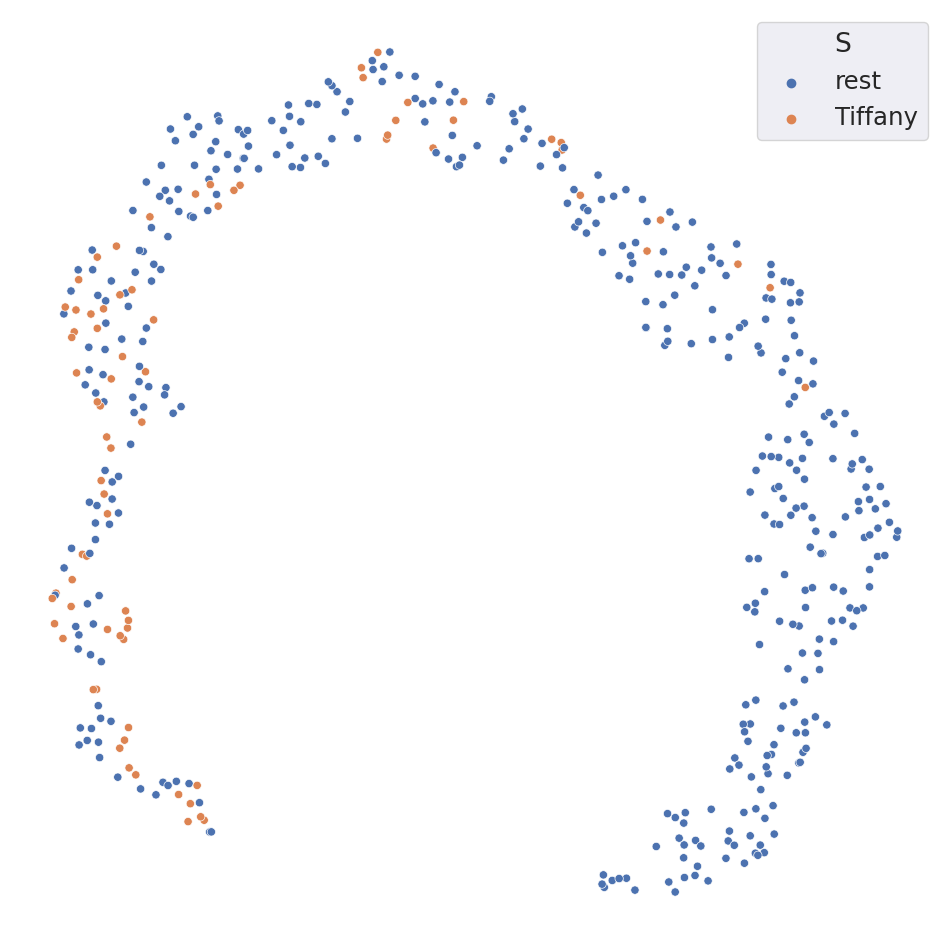

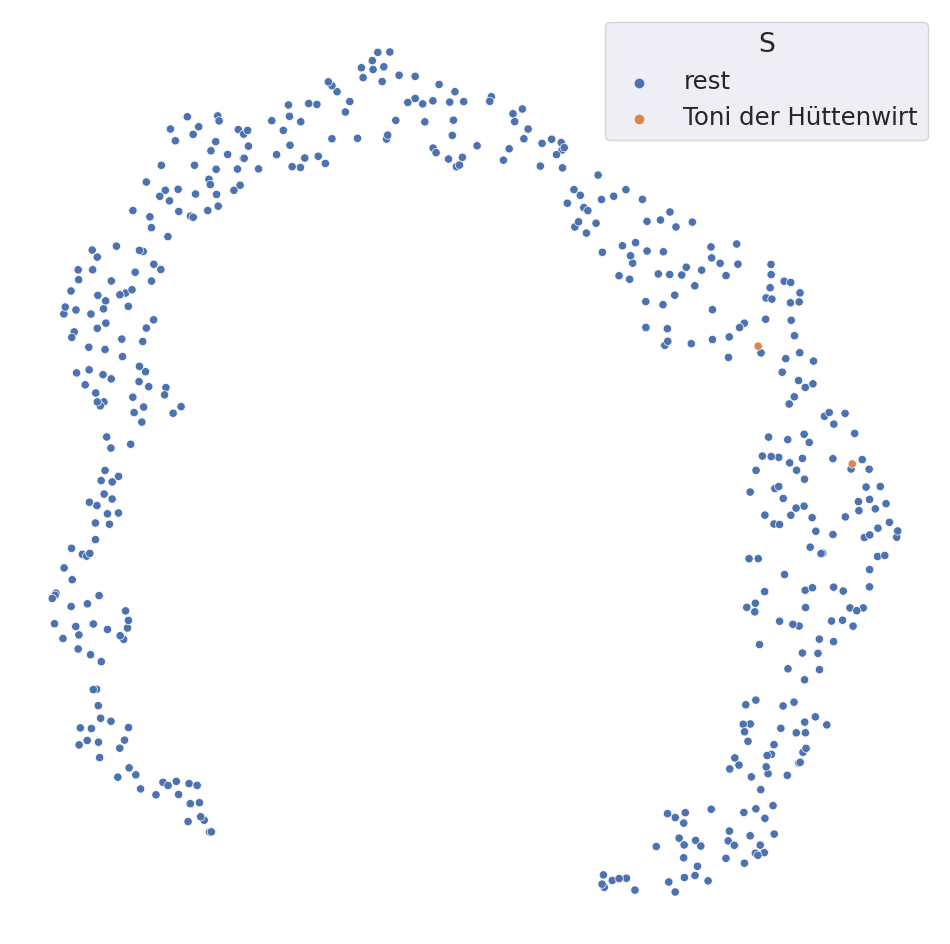

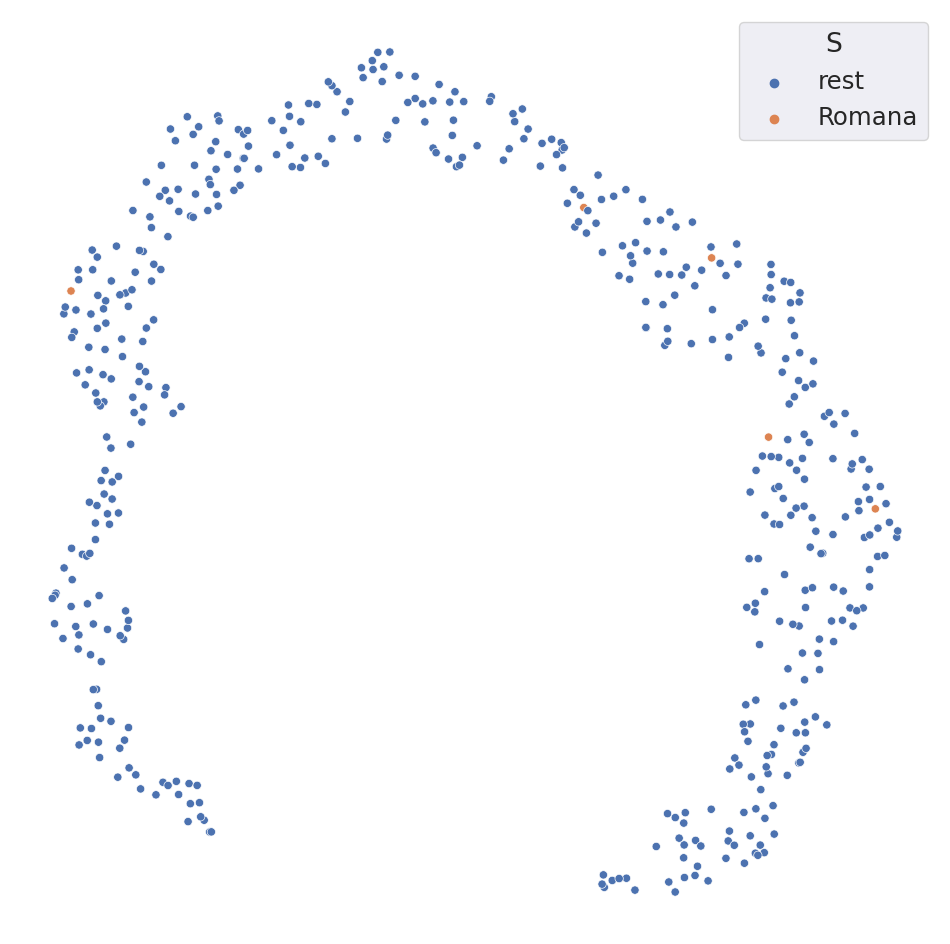

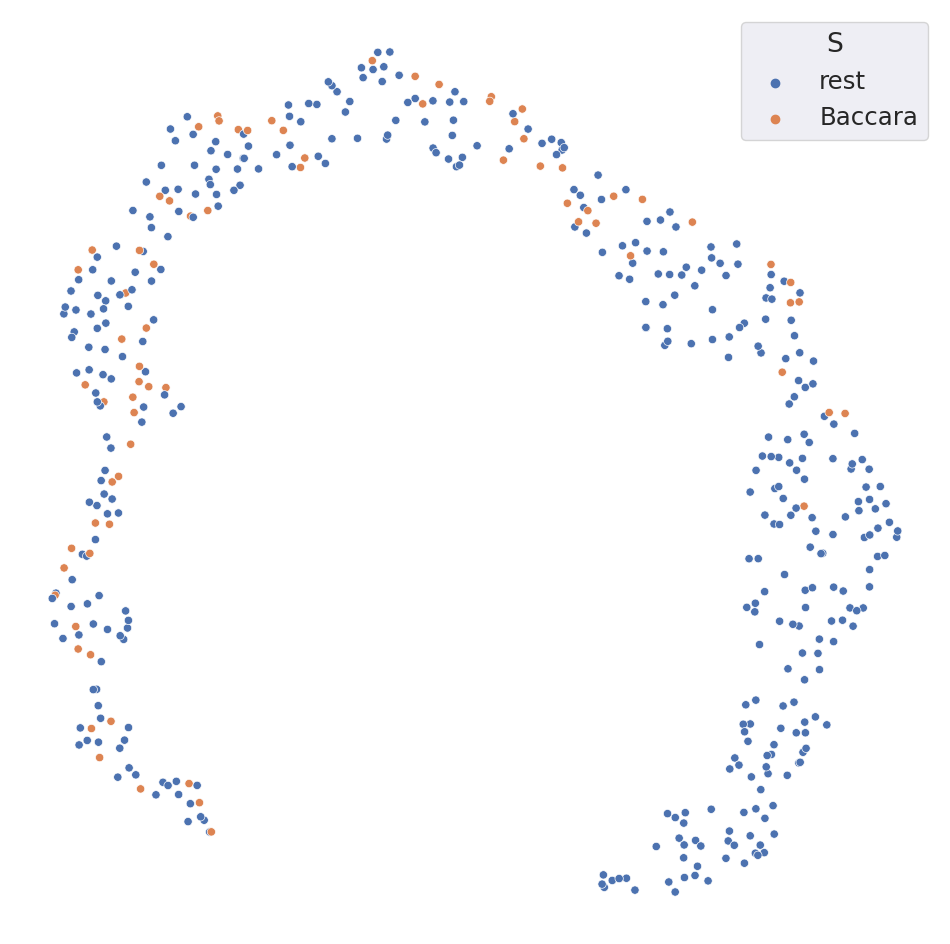

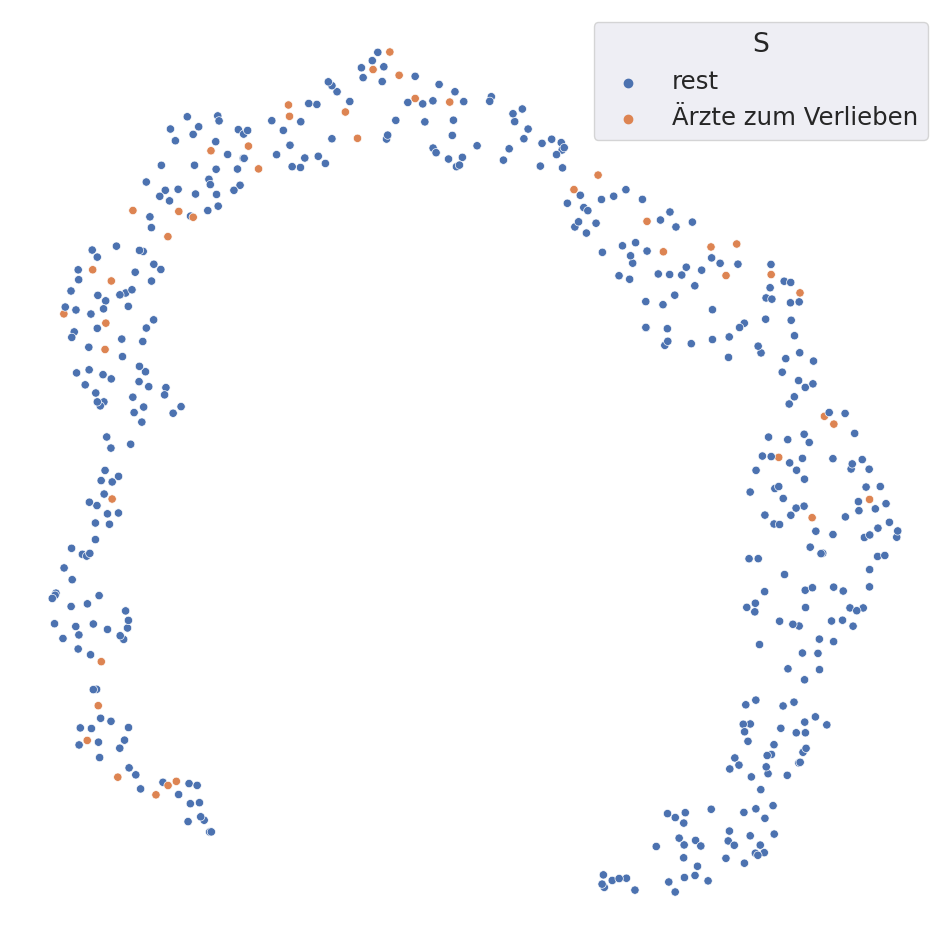

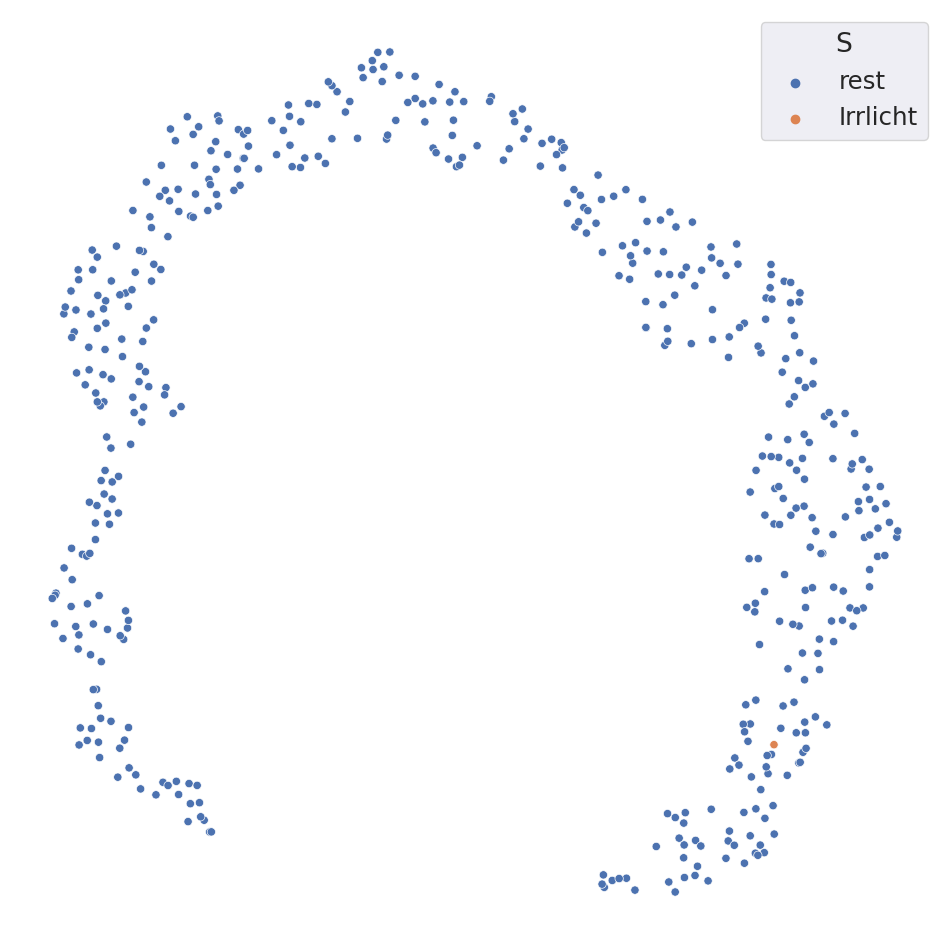

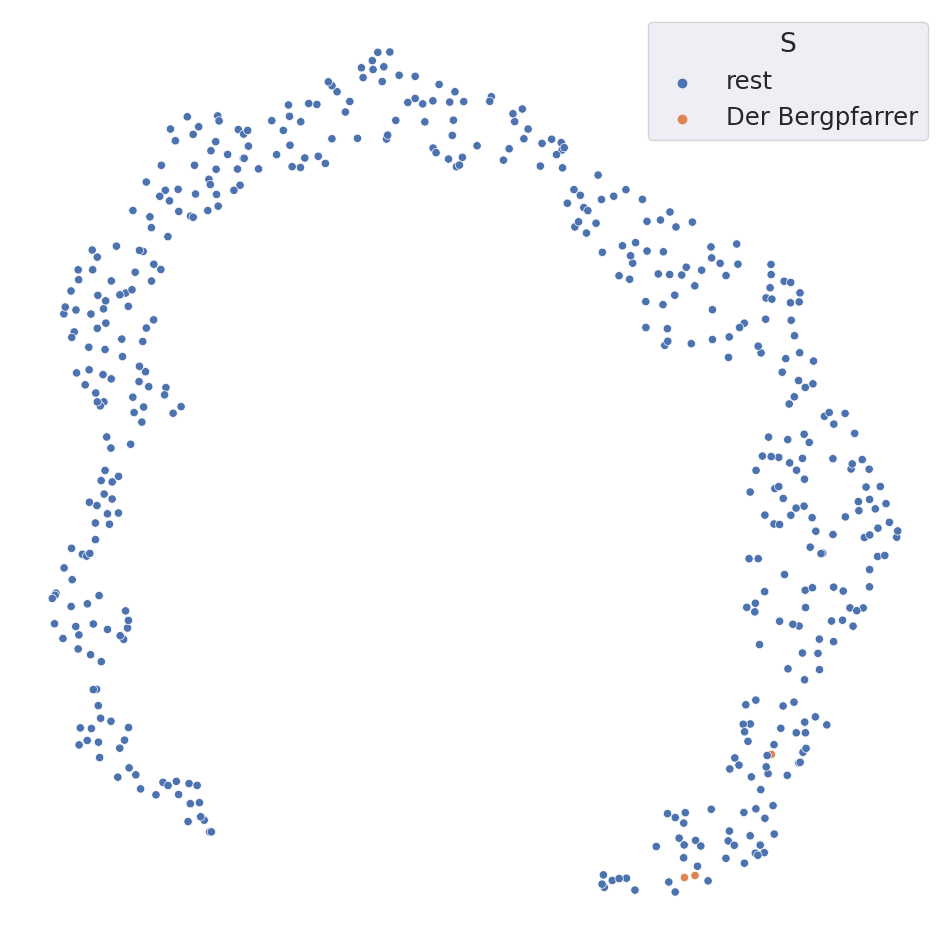

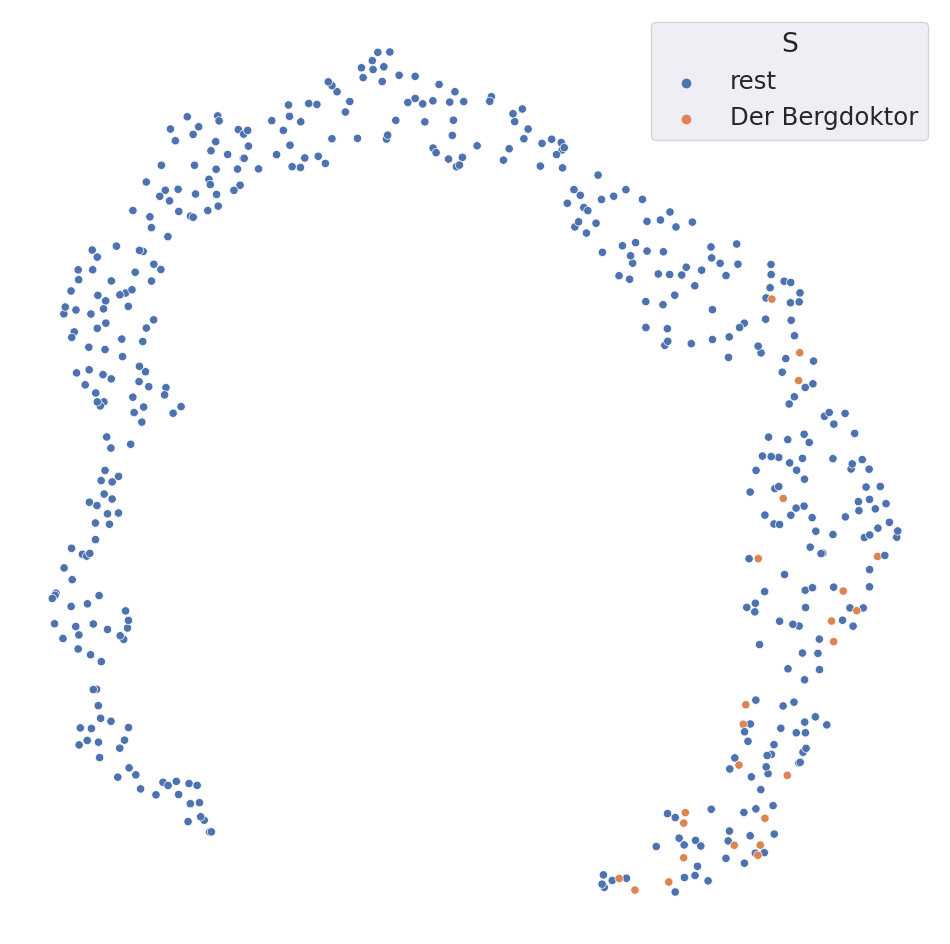

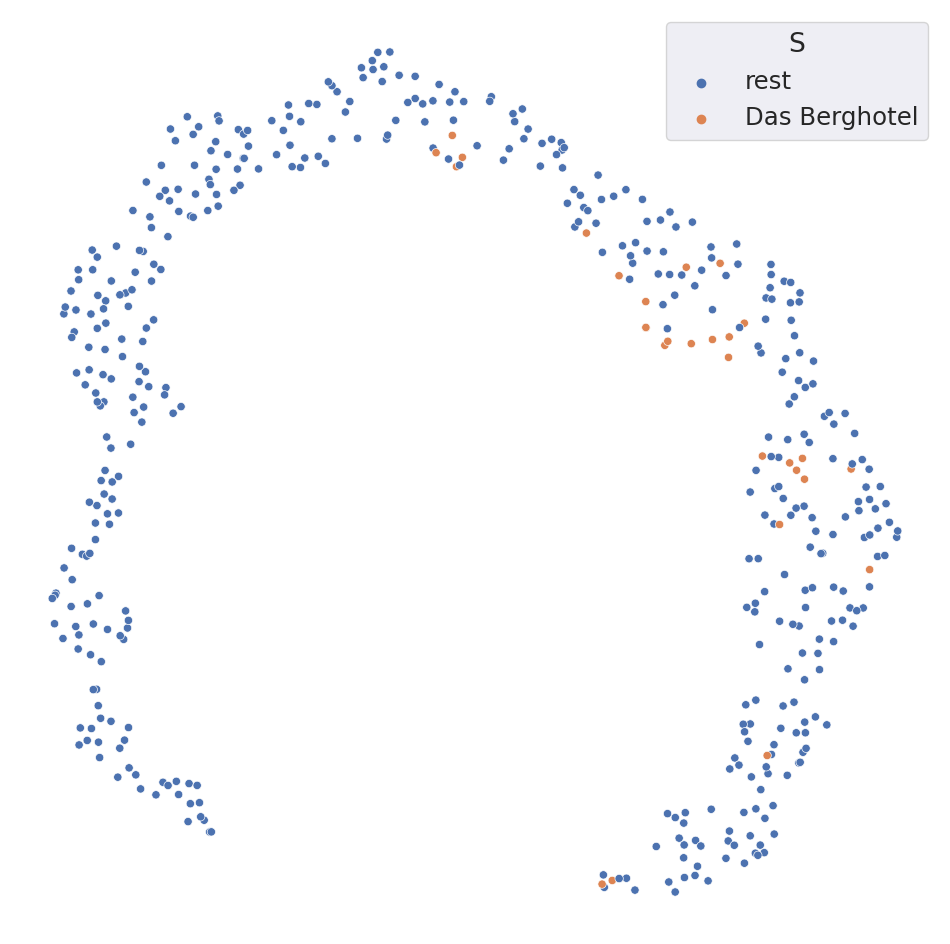

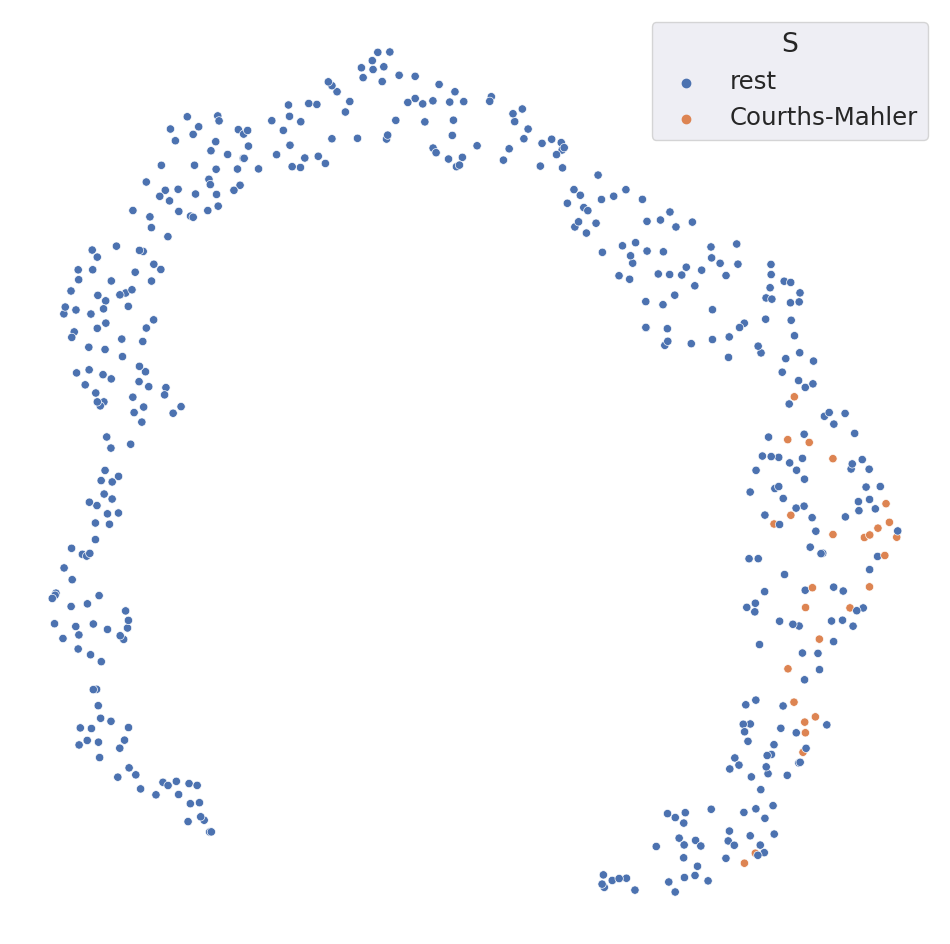

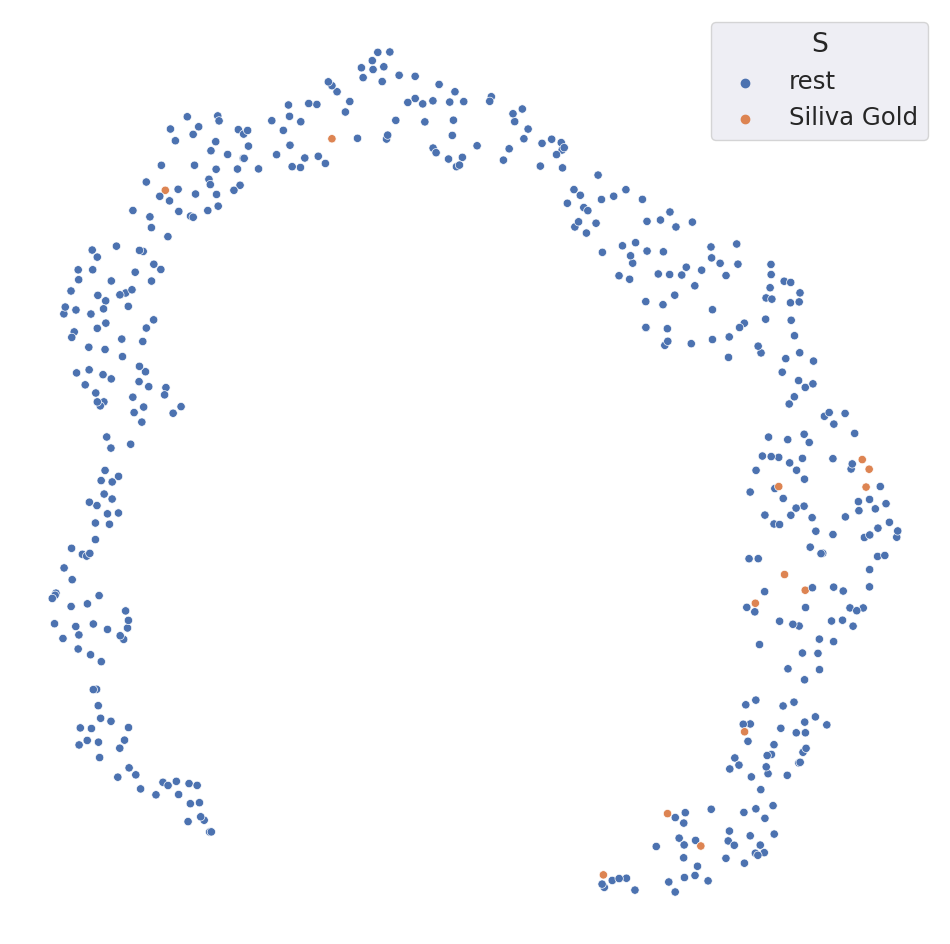

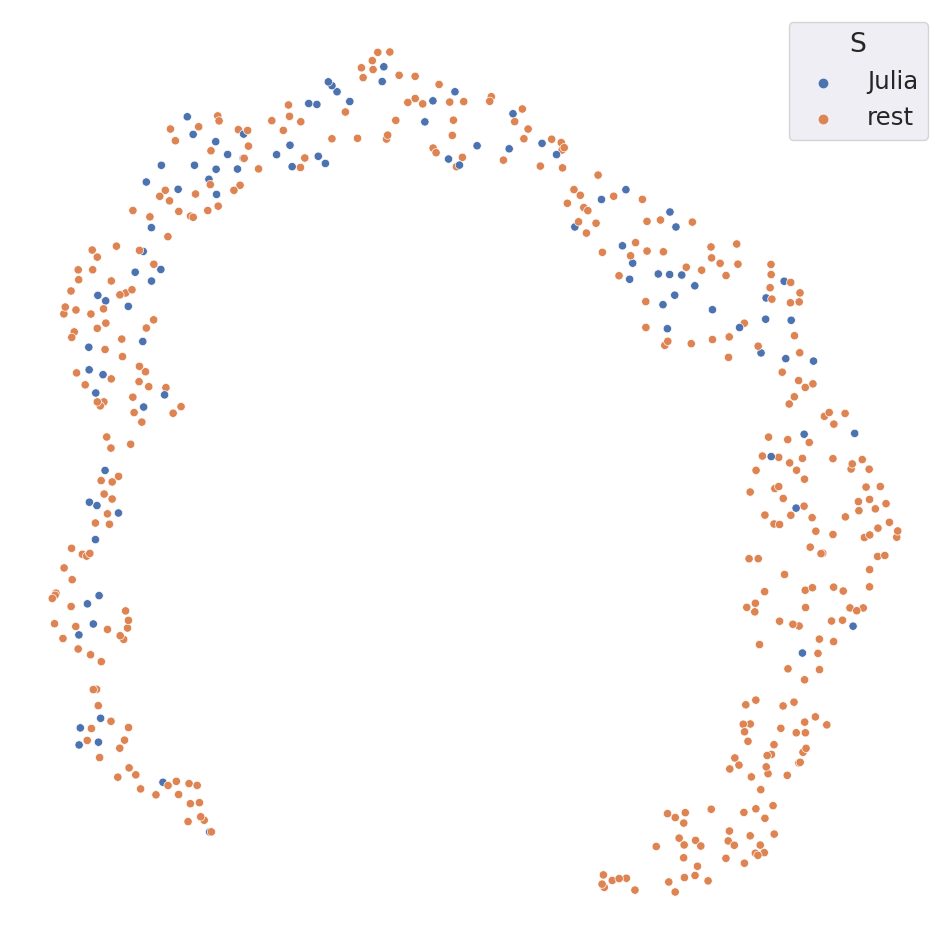

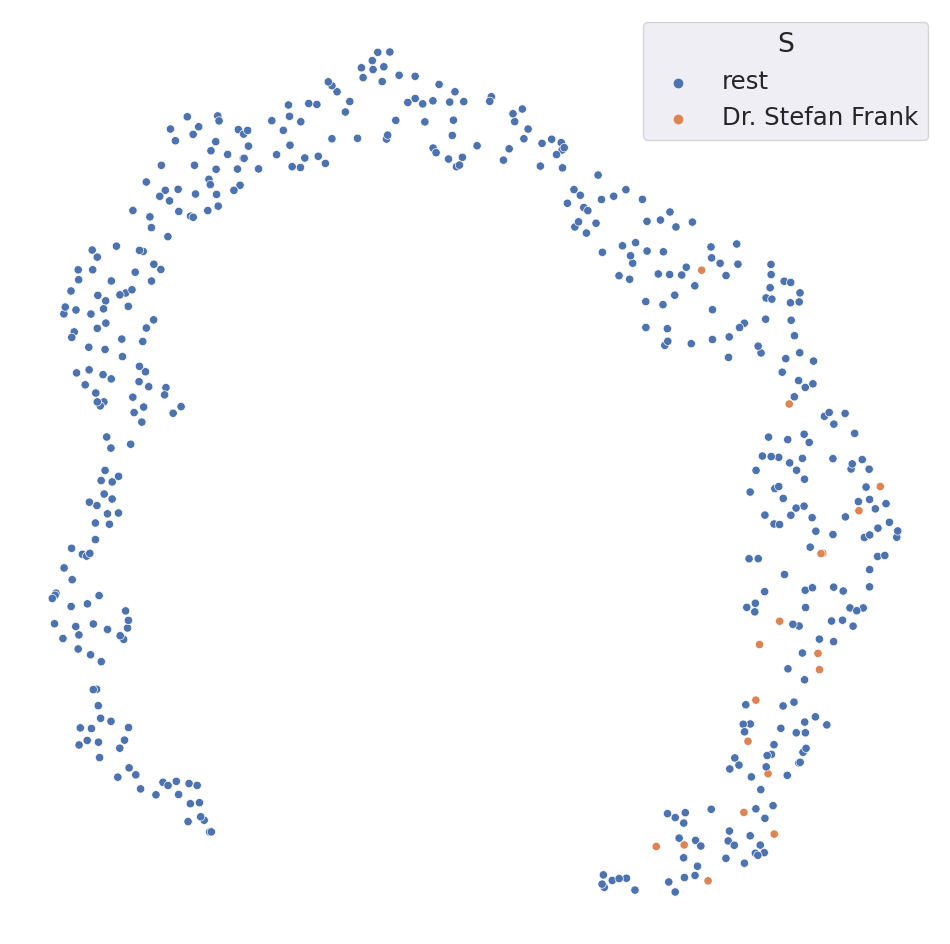

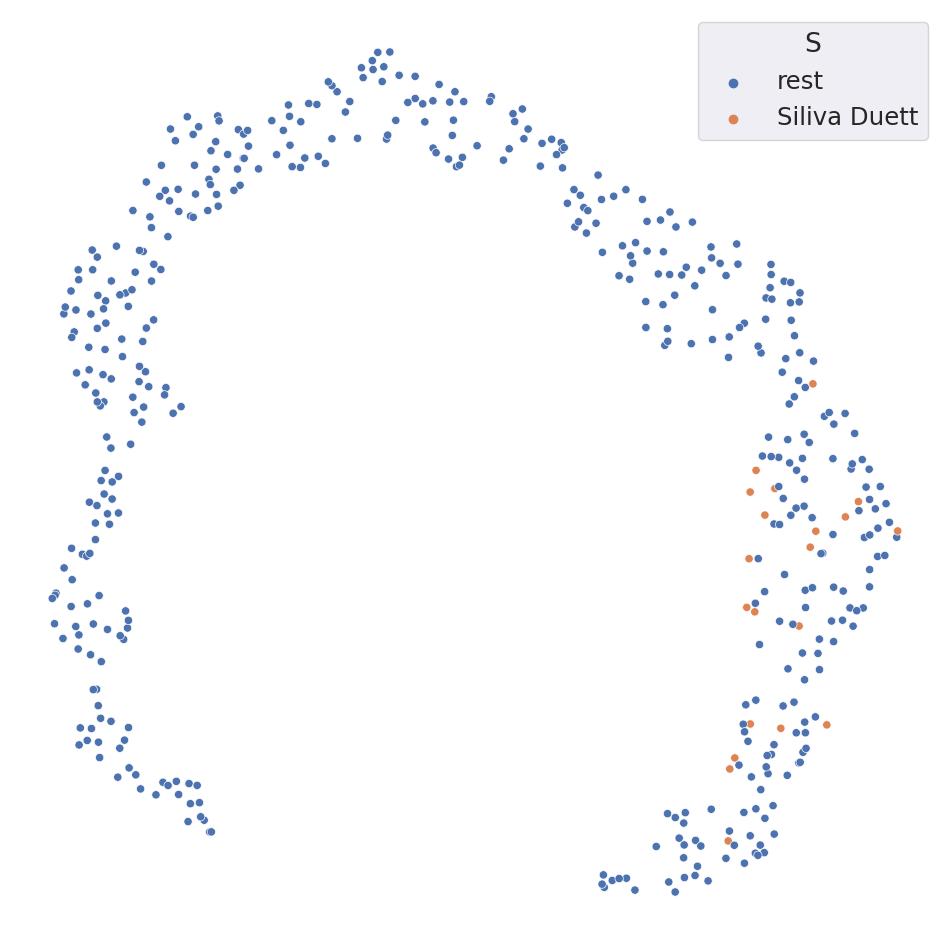

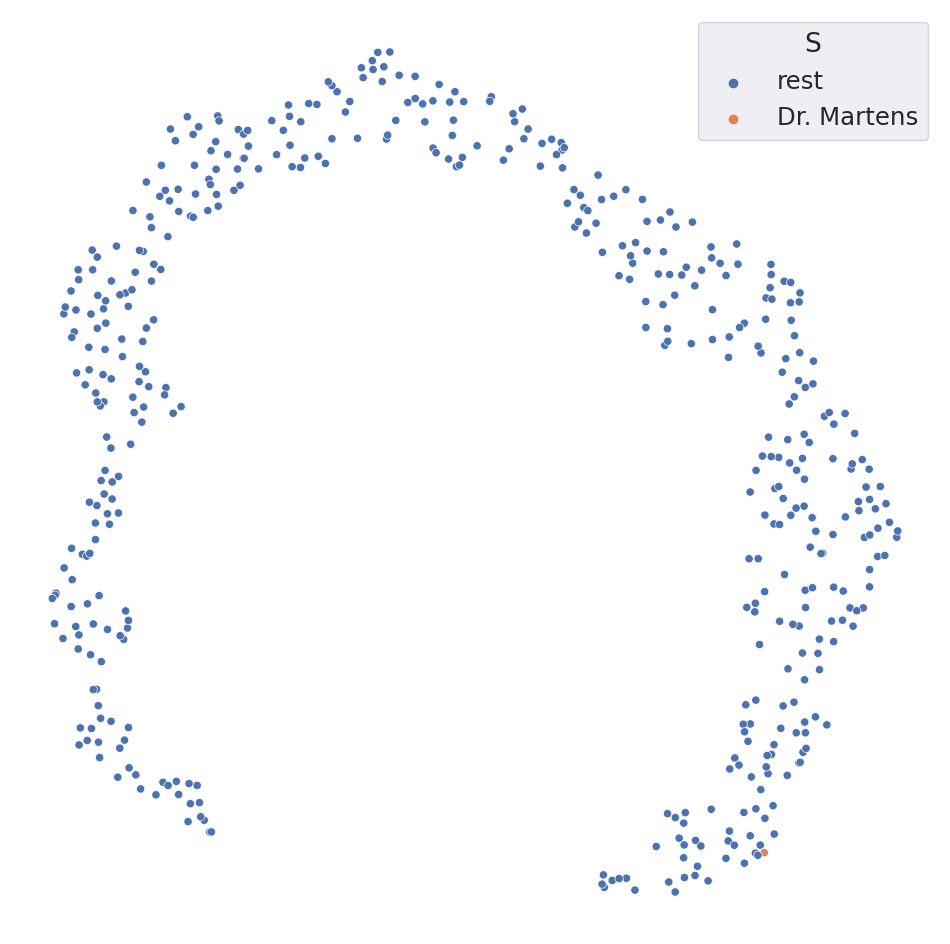

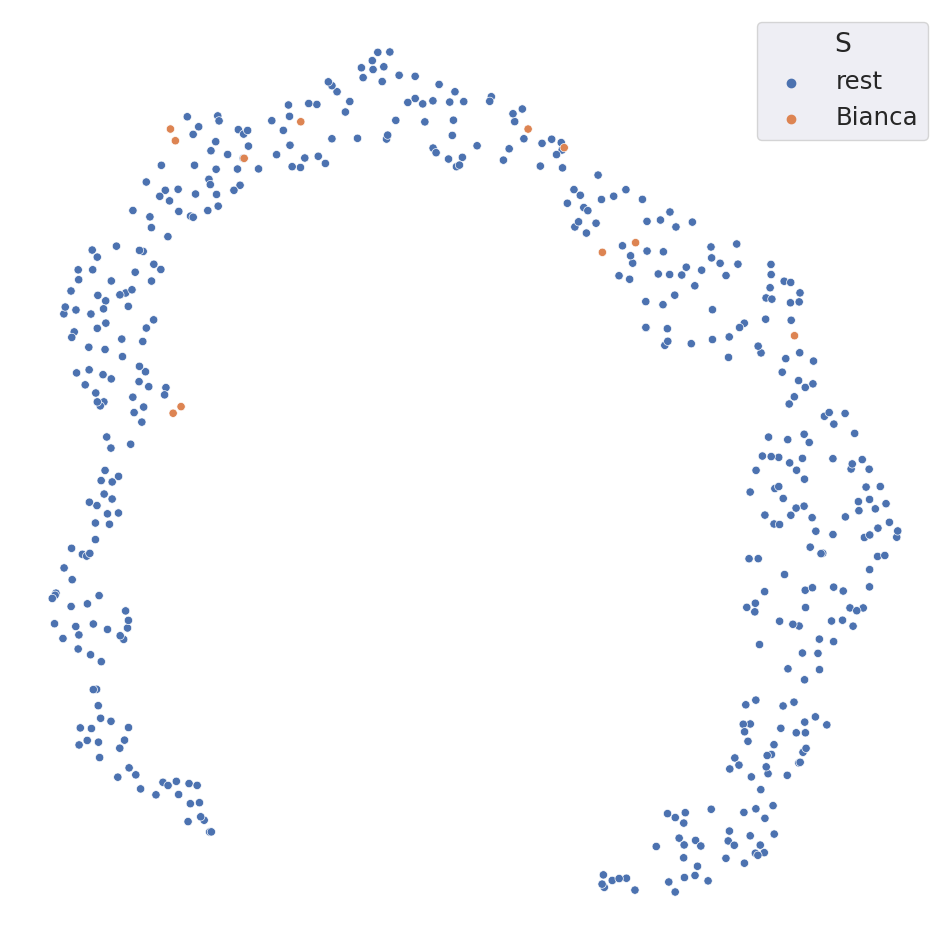

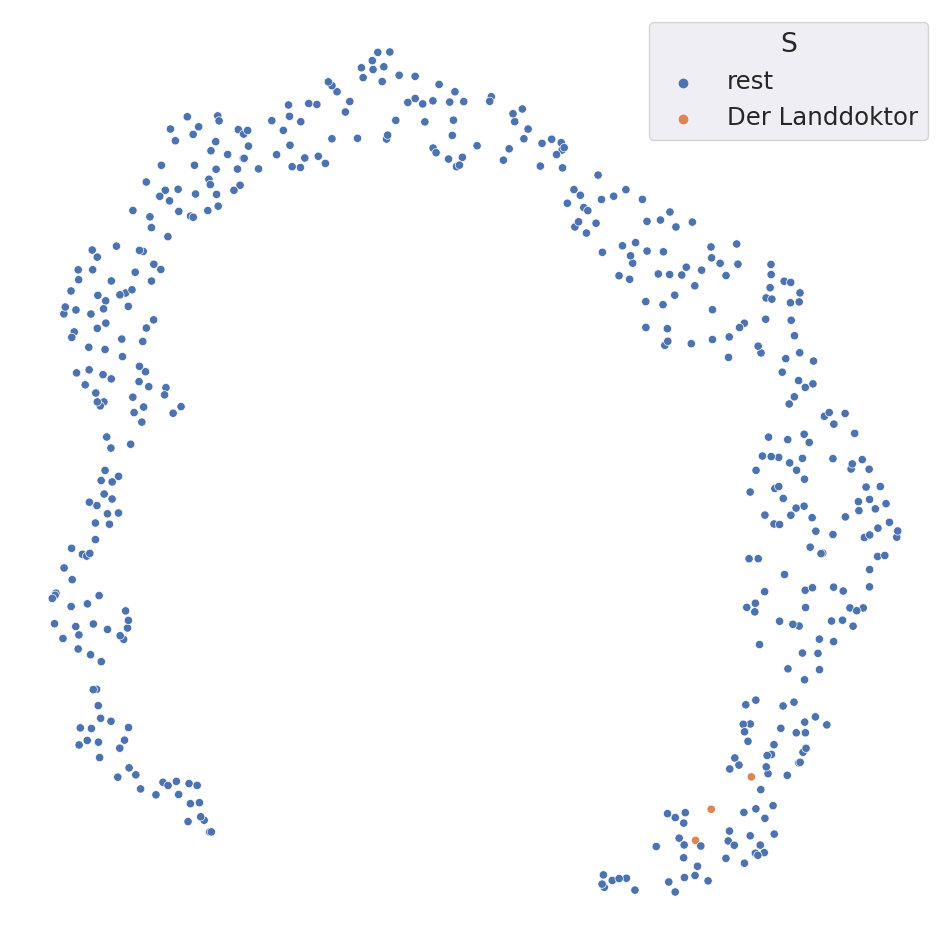

In [138]:
def coloring(x,s):
    
    if x == s:
        return s
    else:
        return "rest"

for se in set(data.Series):
    
    fig, ax = plt.subplots(figsize=(12,12))

    scdata = pd.DataFrame(vecs)
    scdata.columns = ["x","y"]
    scdata["Series"] = list(data.Series)
    scdata["S"] = scdata["Series"].apply(lambda x: coloring(x, se))

    sns.scatterplot(data=scdata, x="x", y="y", hue="S")


    plt.axis("off")
    plt.savefig("scatter_"+se+".png", dpi=300, bbox_inches="tight", format="png")
    plt.show()